# Load Library

In [278]:
# load the library for path
from pathlib import Path
import pandas as pd
import openpyxl as xl
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
from numpy import *

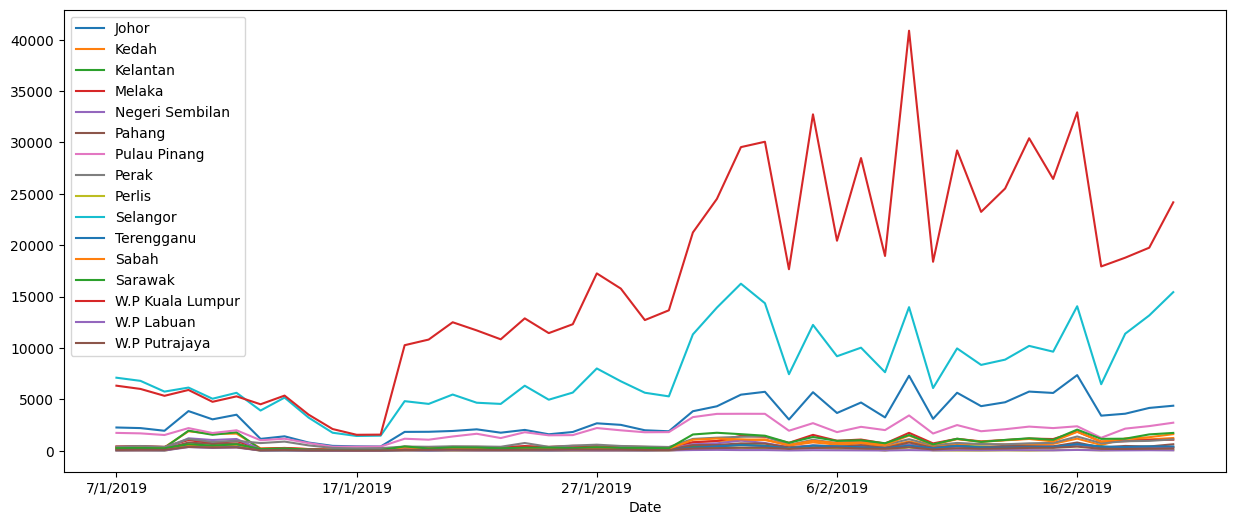

Johor   Kedah  Kelantan  Melaka  Negeri Sembilan  Pahang  \
Date                                                                   
7/1/2019   2262.0   357.0     278.0   422.0            291.0   200.0   
8/1/2019   2204.0   358.0     347.0   459.0            306.0   226.0   
9/1/2019   1943.0   333.0     289.0   378.0            229.0   192.0   
10/1/2019  3858.0  1896.0    1951.0  1034.0           1208.0   797.0   
11/1/2019  3055.0  1645.0    1553.0   727.0           1044.0   653.0   
12/1/2019  3505.0  1665.0    1796.0   938.0           1142.0   718.0   
13/1/2019  1153.0   227.0     145.0   186.0            133.0    89.0   
14/1/2019  1403.0   262.0     140.0   273.0            190.0   112.0   
15/1/2019   796.0   161.0      99.0   161.0            104.0    68.0   
16/1/2019   473.0   108.0      59.0   117.0             53.0    54.0   
18/1/2019   409.0   112.0      70.0    81.0             63.0    37.0   
19/1/2019  1834.0   243.0     110.0   384.0            177.0    94.0   
20/1/2019  1844.0   212.0      91.0   310.0            188.0    97.0   
21/1/2019  1924.0   235.0     140.0   375.0            214.0   148.0   
22/1/2019  2083.0   303.0     129.0   372.0            260.0   123.0   
23/1/2019  1756.0   280.0     105.0   341.0            173.0   105.0   
24/1/2019  2026.0   287.0      99.0   458.0            270.0   130.0   
25/1/2019  1602.0   215.0      87.0   372.0            189.0   132.0   
26/1/2019  1825.0   284.0     118.0   473.0            223.0   129.0   
27/1/2019  2669.0   347.0     120.0   454.0            300.0   156.0   
28/1/2019  2518.0   311.0     114.0   414.0            227.0   144.0   
29/1/2019  1992.0   220.0     105.0   368.0            227.0   101.0   
30/1/2019  1893.0   295.0      92.0   322.0            193.0   125.0   
31/1/2019  3844.0   805.0     413.0   828.0            628.0   545.0   
1/2/2019   4327.0   943.0     455.0   952.0            721.0   557.0   
2/2/2019   5457.0  1016.0     572.0  1450.0            987.0   717.0   
3/2/2019   5735.0  1107.0     495.0  1354.0            755.0   691.0   
4/2/2019   3040.0   499.0     224.0   770.0            328.0   330.0   
5/2/2019   5695.0   816.0     498.0  1544.0            519.0   455.0   
6/2/2019   3674.0   590.0     429.0   971.0            404.0   365.0   
7/2/2019   4693.0   706.0     405.0  1088.0            432.0   545.0   
8/2/2019   3244.0   416.0     270.0   698.0            284.0   263.0   
9/2/2019   7296.0   899.0     590.0  1742.0            583.0   804.0   
10/2/2019  3107.0   452.0     267.0   714.0            262.0   291.0   
11/2/2019  5643.0   622.0     472.0  1159.0            402.0   472.0   
12/2/2019  4339.0   599.0     386.0   911.0            291.0   279.0   
13/2/2019  4719.0   615.0     364.0  1043.0            316.0   482.0   
14/2/2019  5757.0   645.0     417.0  1184.0            362.0   446.0   
15/2/2019  5624.0   668.0     335.0  1139.0            408.0   431.0   
16/2/2019  7359.0  1179.0     607.0  1868.0            601.0   798.0   
17/2/2019  3414.0   555.0     411.0   890.0            246.0   314.0   
18/2/2019  3603.0  1185.0     286.0   924.0            317.0   464.0   
19/2/2019  4166.0  1106.0     392.0  1047.0            304.0   414.0   
20/2/2019  4381.0  1238.0     342.0  1072.0            341.0   629.0   

           Pulau Pinang   Perak  Perlis  Selangor  Terengganu   Sabah  \
Date                                                                    
7/1/2019         1736.0   394.0     2.0    7107.0        72.0   238.0   
8/1/2019         1690.0   456.0     9.0    6801.0        76.0   278.0   
9/1/2019         1530.0   372.0     8.0    5756.0        56.0   212.0   
10/1/2019        2202.0  1141.0   440.0    6146.0       445.0   573.0   
11/1/2019        1725.0   857.0   418.0    5061.0       351.0   446.0   
12/1/2019        1989.0   971.0   379.0    5638.0       393.0   593.0   
13/1/2019        1020.0   744.0     5.0    3912.0        36.0   111.0   
14/1/2019        1168.0   890.0     5.0   

In [279]:
# import data set
data_dir = Path('../datathon')

# read xlsx data set
df = pd.read_csv(data_dir/'Job Vacancy by States.csv', index_col = [0], parse_dates=[0])

# remove all the empty column
df = df.dropna(axis=1, how='all')

# plot the graph of job vacancy by states
df.plot(figsize=(15, 6))
plt.show()

df.dropna(inplace=True)
df

# 3. Test for Data Set
## 3.1 Stationary Test

In [280]:
for i in range(df.shape[1]):
    column_name = df.columns[i]
    column_data = df.iloc[:, i]  # Access column data using iloc

    # Perform the ADF test
    adft = adfuller(column_data, autolag='AIC')
    
    if df.iloc[:, i].isna().any():
        df = df.dropna()

    # Create a DataFrame to display the ADF test results
    output_df = pd.DataFrame({
        "Values": [adft[0], adft[1], adft[2], adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']],
        "Metric": ["Test Statistics", "p-value", "No. of lags used", "Number of observations used",
                   "critical value (1%)", "critical value (5%)", "critical value (10%)"]
    })

    # Print the column name and ADF test results
    print(f"Results for {column_name}:")
    print(output_df, "\n")


Results for Johor:
      Values                       Metric
0  -1.563650              Test Statistics
1   0.501823                      p-value
2   1.000000             No. of lags used
3  42.000000  Number of observations used
4  -3.596636          critical value (1%)
5  -2.933297          critical value (5%)
6  -2.604991         critical value (10%) 

Results for Kedah:
      Values                       Metric
0  -2.494182              Test Statistics
1   0.116896                      p-value
2   1.000000             No. of lags used
3  42.000000  Number of observations used
4  -3.596636          critical value (1%)
5  -2.933297          critical value (5%)
6  -2.604991         critical value (10%) 

Results for Kelantan:
      Values                       Metric
0  -2.790548              Test Statistics
1   0.059637                      p-value
2   1.000000             No. of lags used
3  42.000000  Number of observations used
4  -3.596636          critical value (1%)
5  -2.933297

## 3.2 Autocorrelation

In [281]:
for i in range(df.shape[1]):
    column_name = df.columns[i]
    print(f"Results for {column_name}:")

    autocorrelation_lag1 = df.iloc[:, i].autocorr(lag=1)
    print("One Month Lag: ", autocorrelation_lag1)

    autocorrelation_lag3 = df.iloc[:, i].autocorr(lag=3)
    print("Three Month Lag: ", autocorrelation_lag3)

    autocorrelation_lag6 = df.iloc[:, i].autocorr(lag=6)
    print("Six Month Lag: ", autocorrelation_lag6)

    autocorrelation_lag9 = df.iloc[:, i].autocorr(lag=9)
    print("Nine Month Lag: ", autocorrelation_lag9)
    
    print("\n")

Results for Johor:
One Month Lag:  0.602566958106289
Three Month Lag:  0.485902534246268
Six Month Lag:  0.49969660222636897
Nine Month Lag:  0.4451364148239761


Results for Kedah:
One Month Lag:  0.572373865957628
Three Month Lag:  -0.028474000314460565
Six Month Lag:  -0.0617541599208032
Nine Month Lag:  -0.03165662419571206


Results for Kelantan:
One Month Lag:  0.5644435238246233
Three Month Lag:  -0.054274184104245934
Six Month Lag:  -0.17660936779165856
Nine Month Lag:  -0.19536976494449826


Results for Melaka:
One Month Lag:  0.5752033535099426
Three Month Lag:  0.4657250577959541
Six Month Lag:  0.4195091560559042
Nine Month Lag:  0.3808633966268621


Results for Negeri Sembilan:
One Month Lag:  0.5375646580378511
Three Month Lag:  -0.10605641734098593
Six Month Lag:  -0.16832307808170713
Nine Month Lag:  -0.09352455695519907


Results for Pahang:
One Month Lag:  0.5030522849323372
Three Month Lag:  0.13272018655394335
Six Month Lag:  0.17808990800045432
Nine Month Lag:  0.1

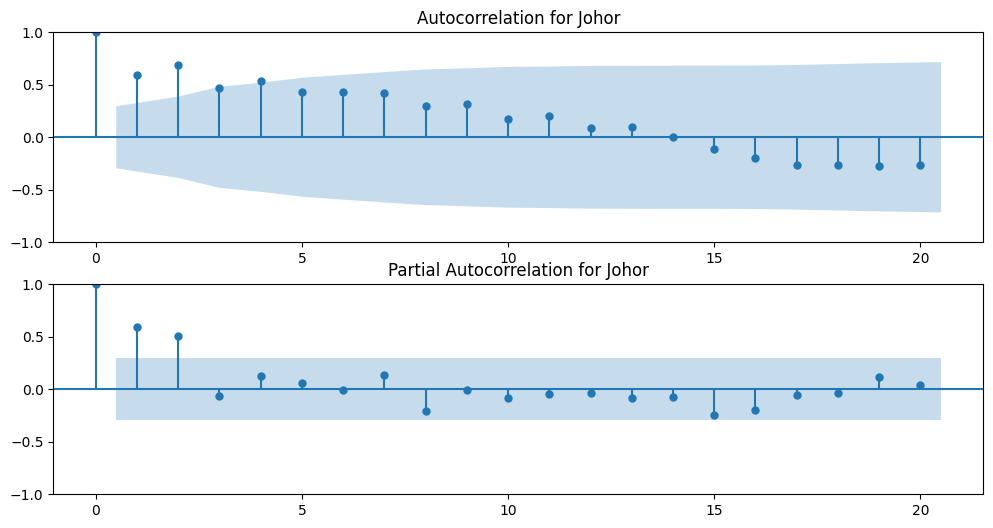

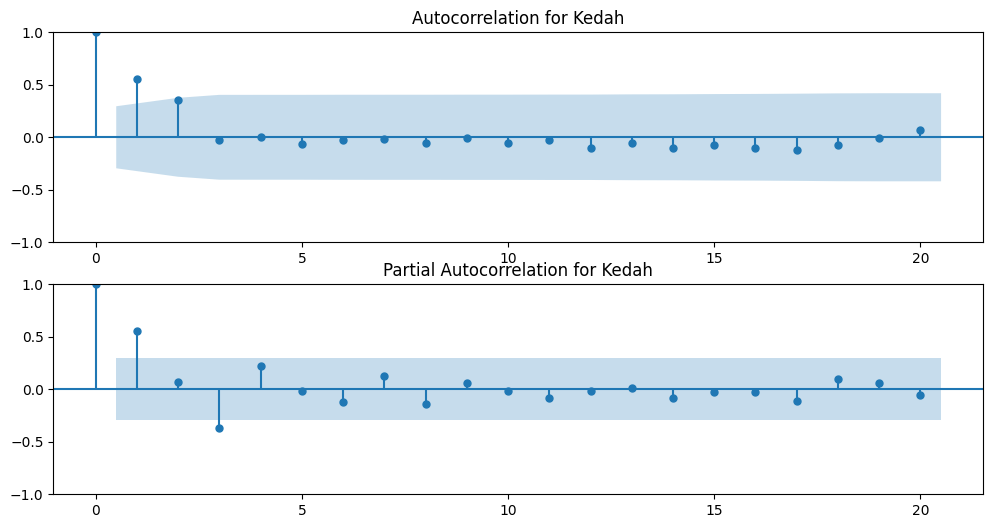

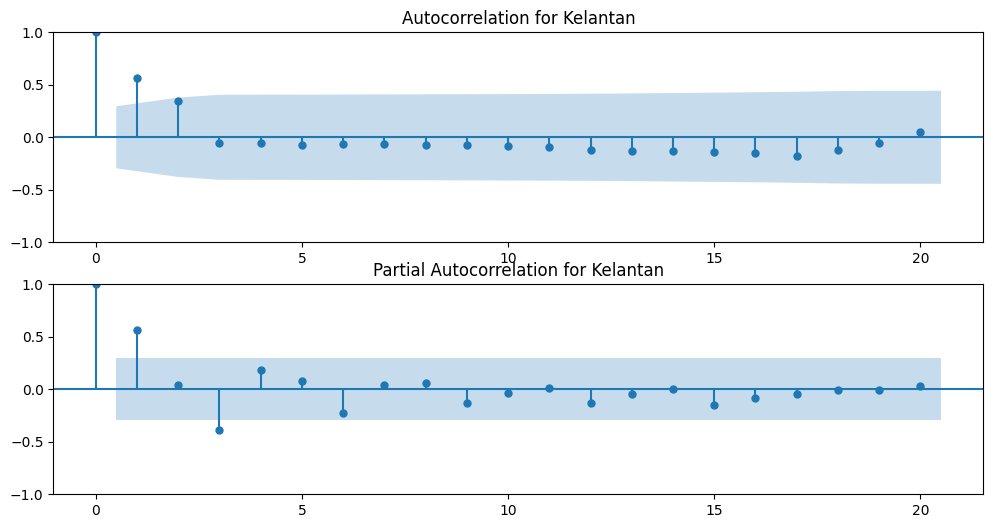

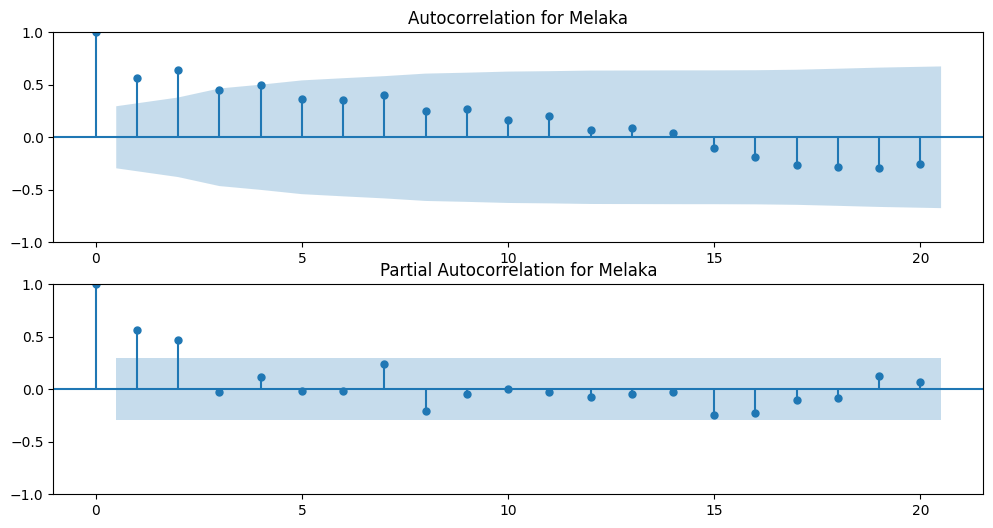

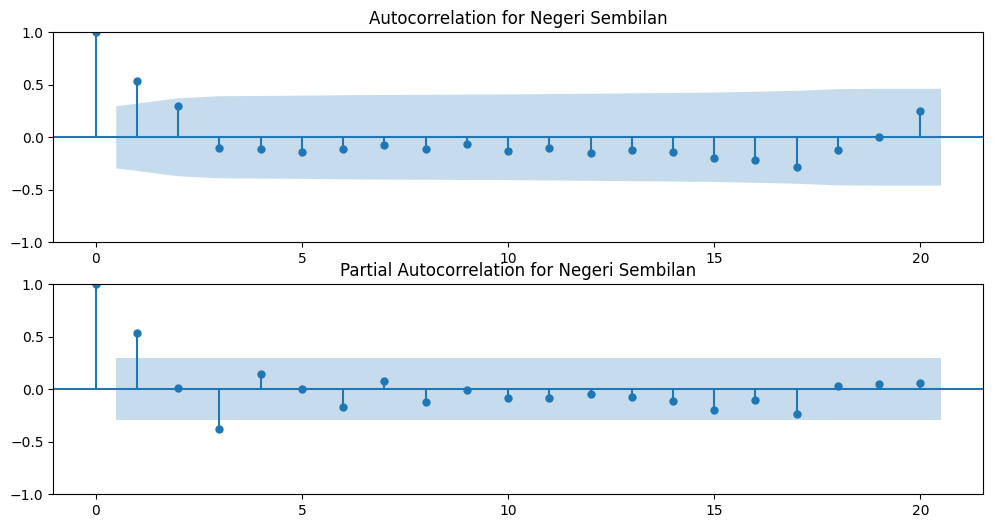

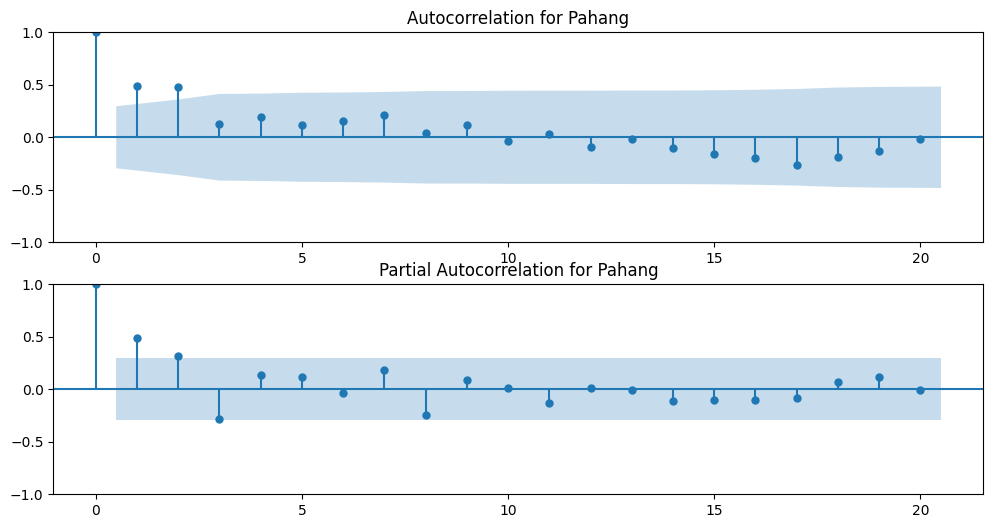

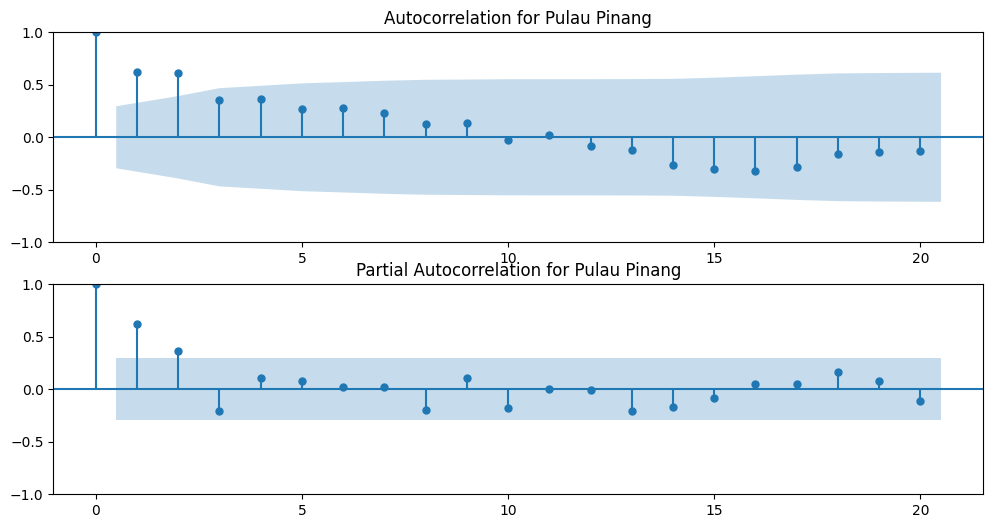

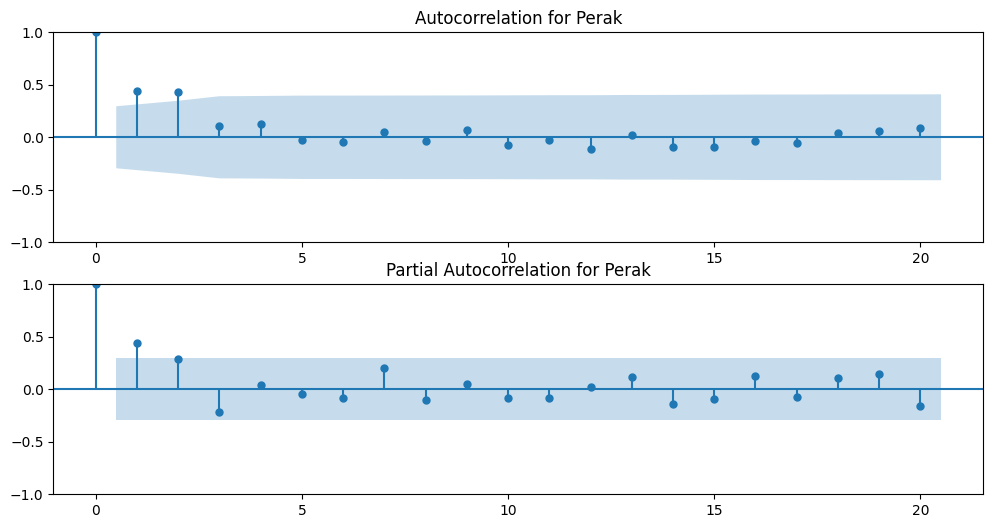

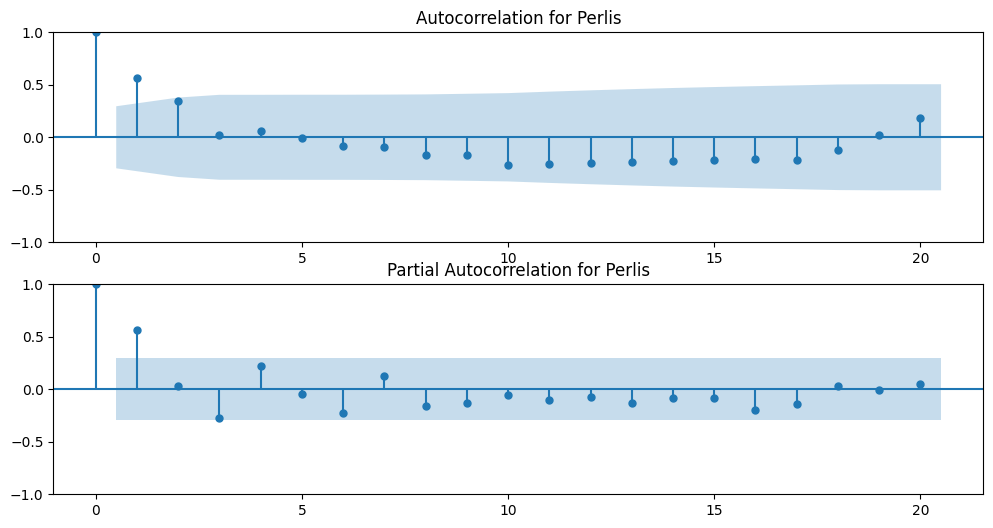

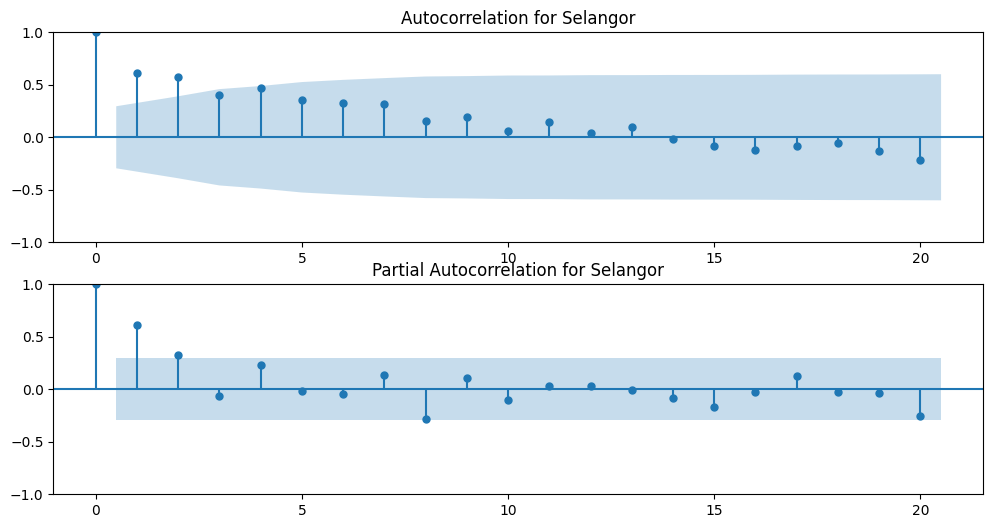

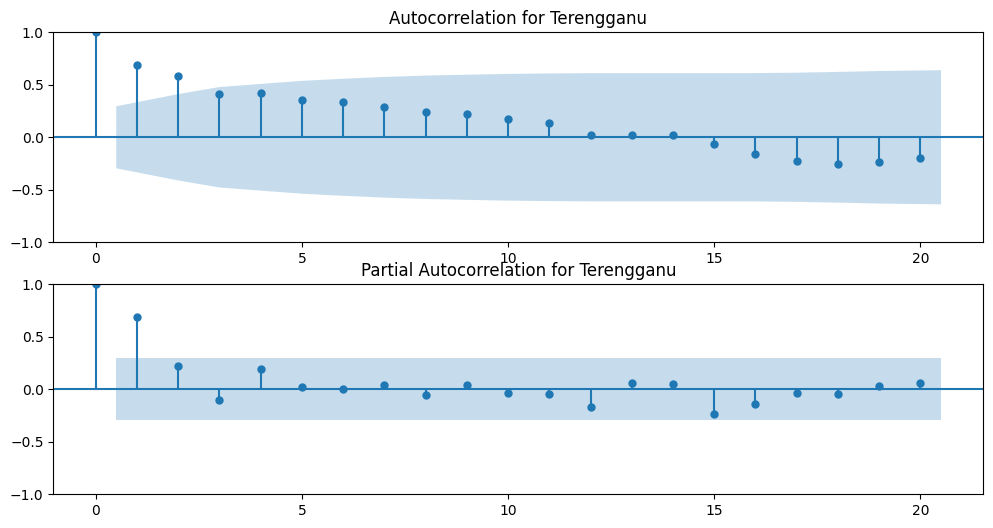

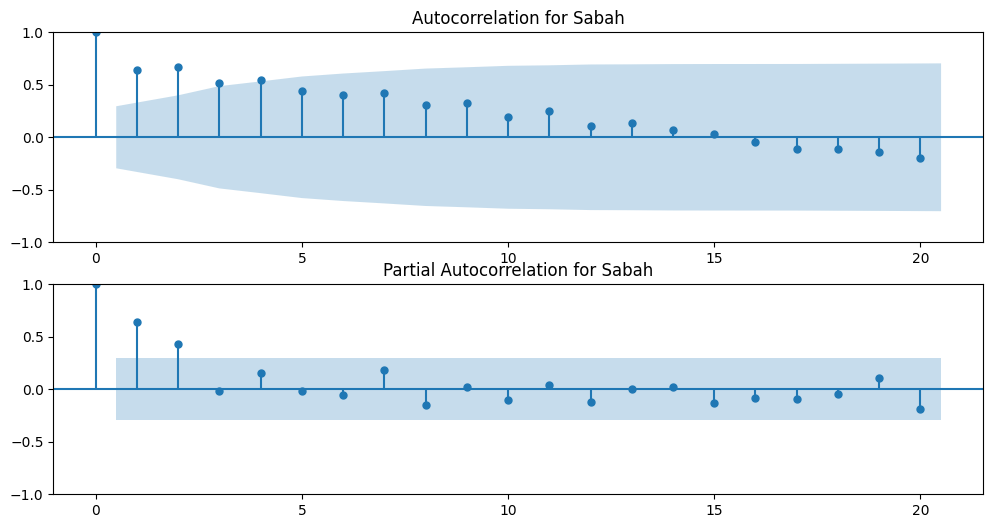

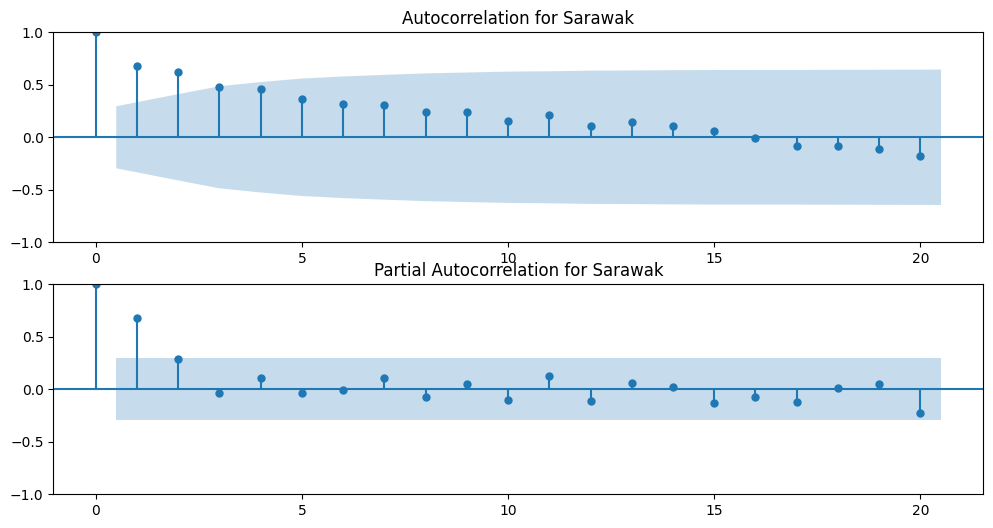

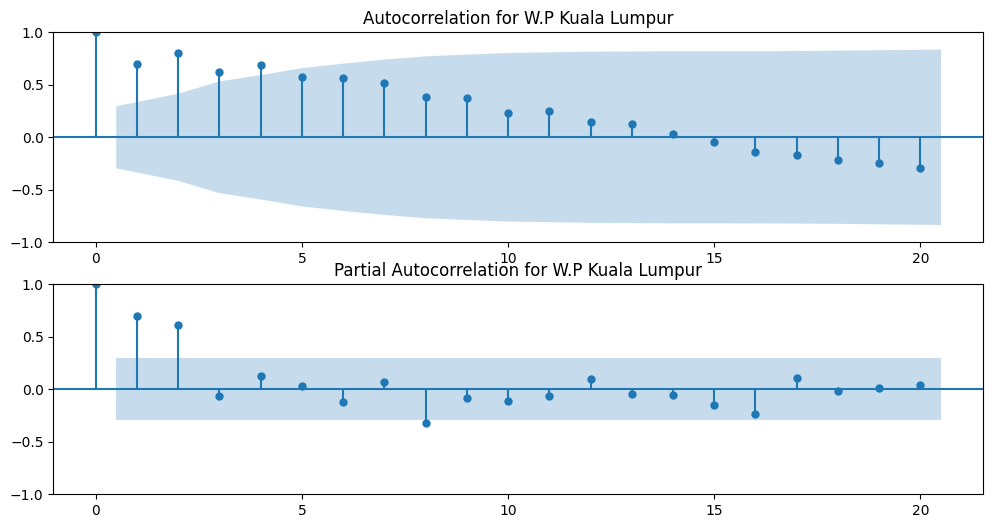

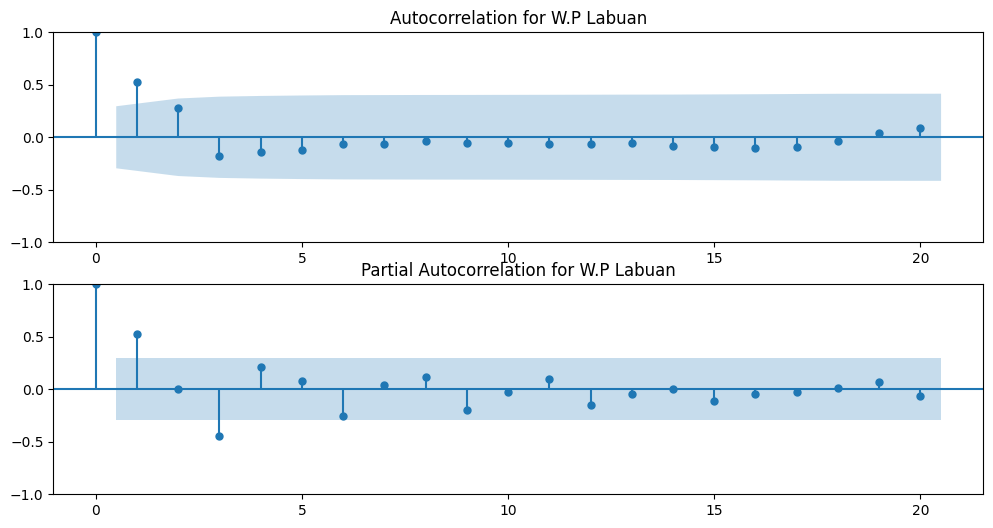

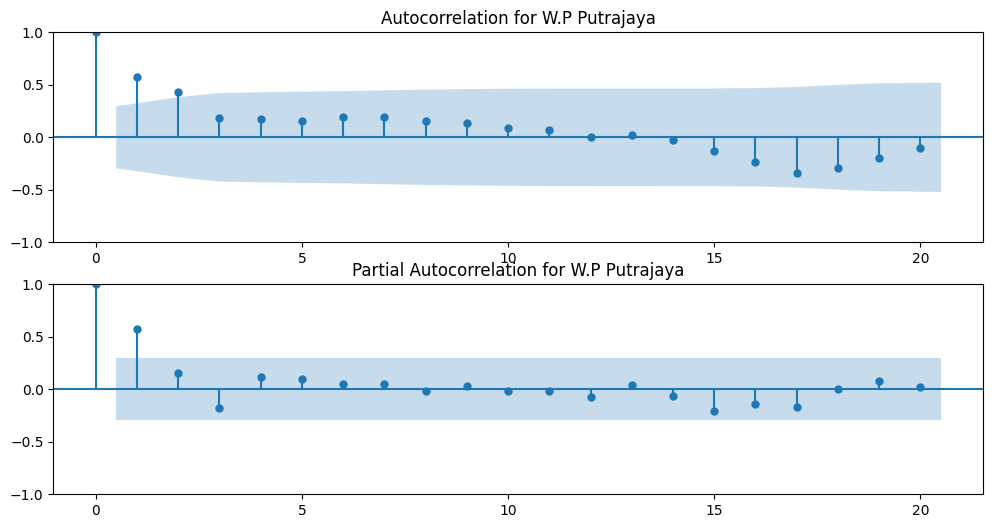

In [282]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for i in range(df.shape[1]):
    column_name = df.columns[i]

    fig, ax = plt.subplots(2, figsize=(12,6))
    ax[0] = plot_acf(df.iloc[:, i], ax=ax[0], lags=20, title=f"Autocorrelation for {column_name}")
    ax[1] = plot_pacf(df.iloc[:, i], ax=ax[1], lags=20, title=f"Partial Autocorrelation for {column_name}")

## 3.3 Decomposition

# 4. Data Transformation

Results for Johor:
After differencing:
         Values                       Metric
0 -1.307140e+01              Test Statistics
1  1.953716e-24                      p-value
2  0.000000e+00             No. of lags used
3  4.200000e+01  Number of observations used
4 -3.596636e+00          critical value (1%)
5 -2.933297e+00          critical value (5%)
6 -2.604991e+00         critical value (10%)


Results for Kedah:
After differencing:
         Values                       Metric
0 -8.443438e+00              Test Statistics
1  1.738232e-13                      p-value
2  0.000000e+00             No. of lags used
3  4.200000e+01  Number of observations used
4 -3.596636e+00          critical value (1%)
5 -2.933297e+00          critical value (5%)
6 -2.604991e+00         critical value (10%)


Results for Kelantan:
After differencing:
         Values                       Metric
0 -8.181431e+00              Test Statistics
1  8.111490e-13                      p-value
2  0.000000e+00      

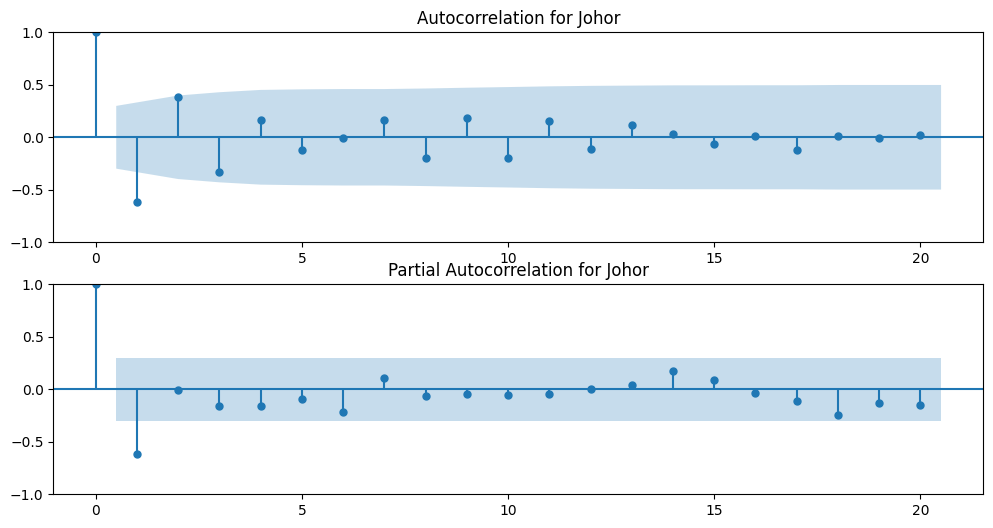

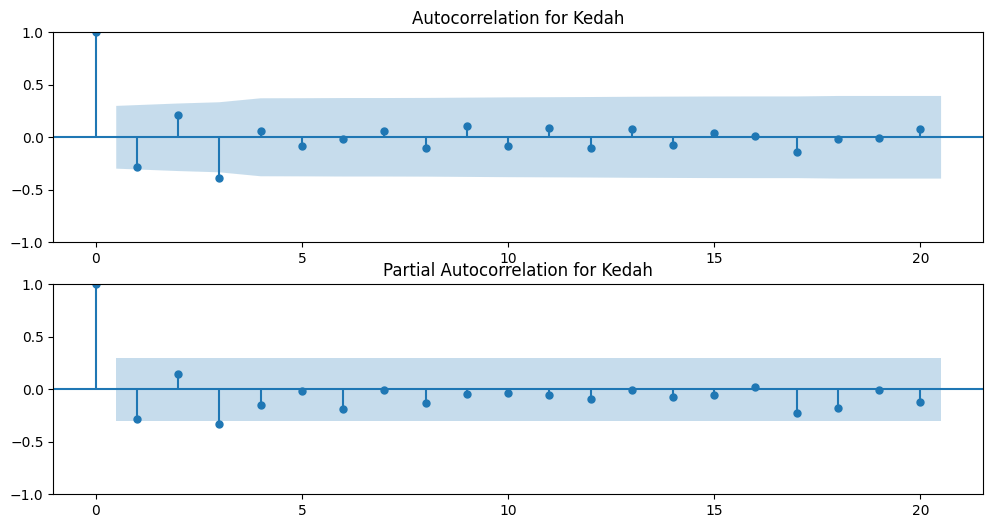

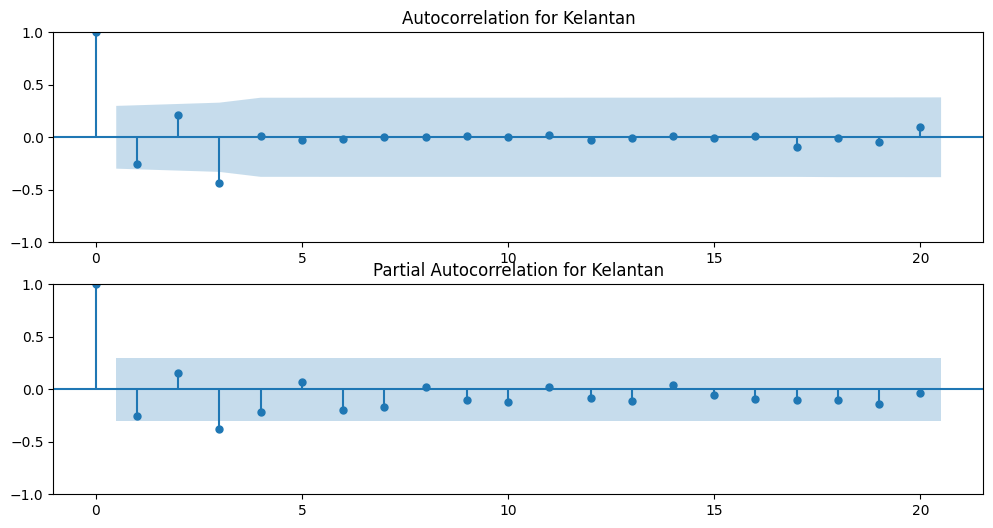

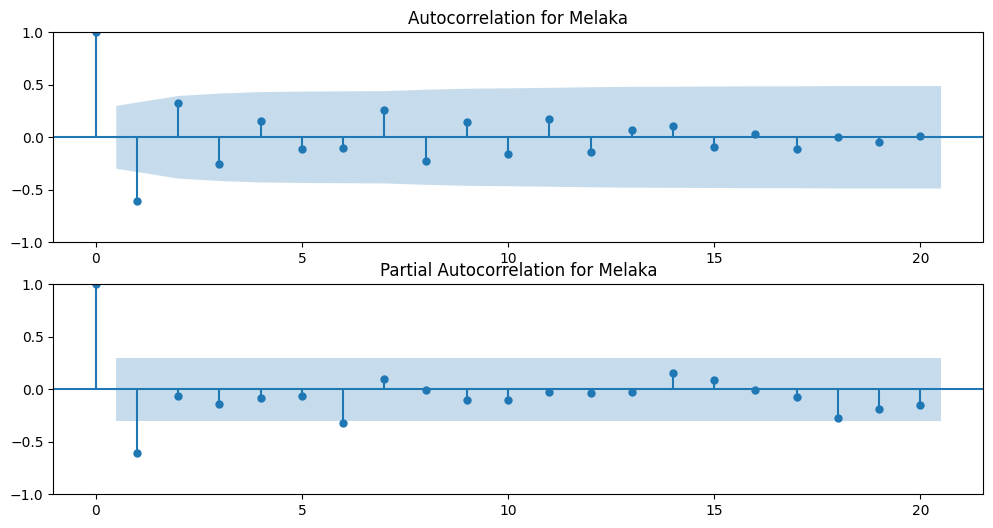

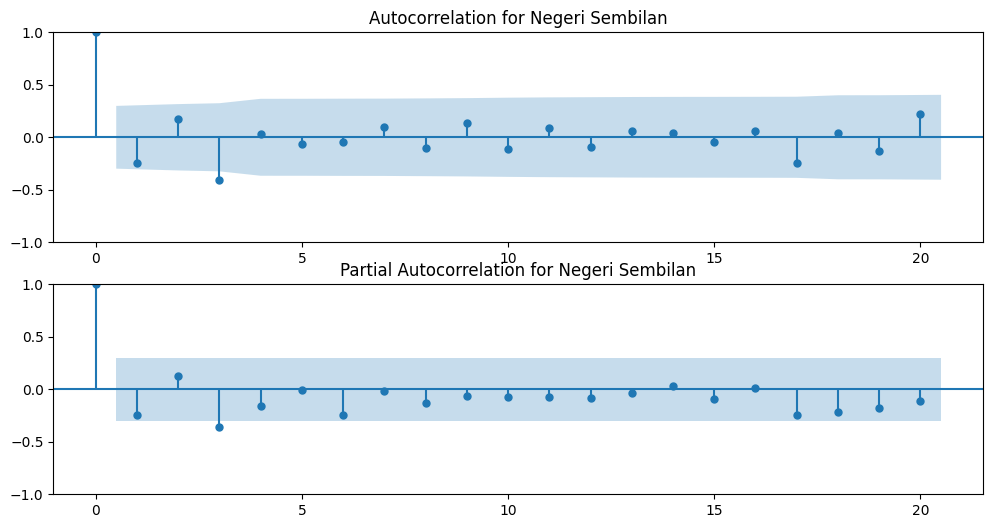

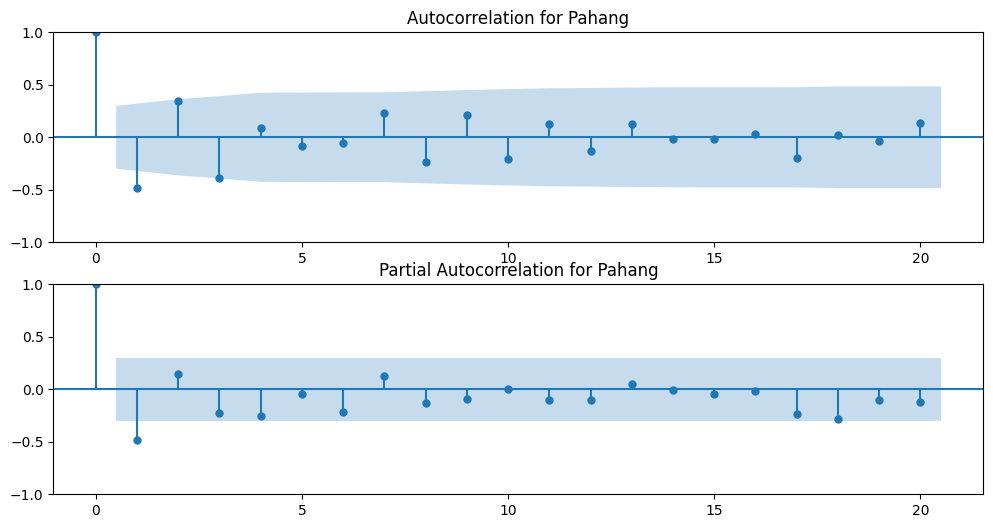

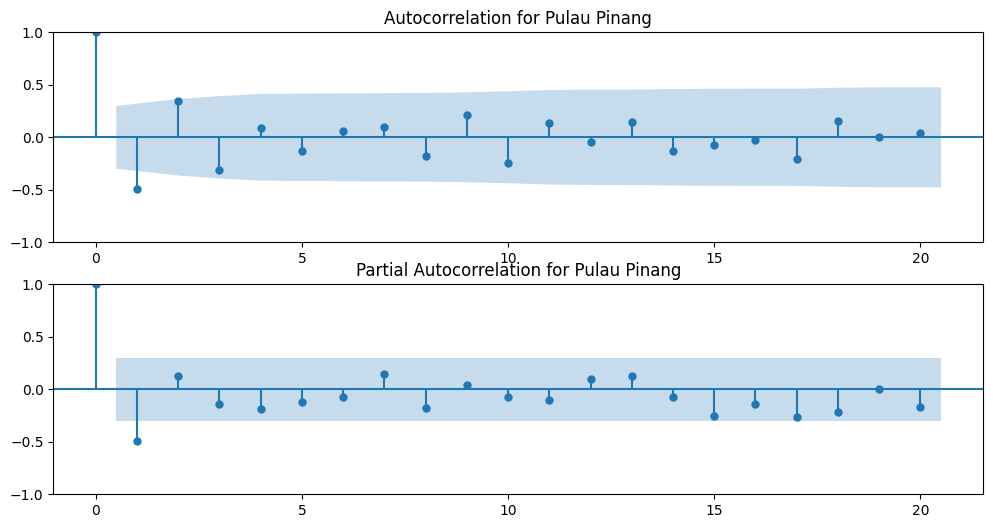

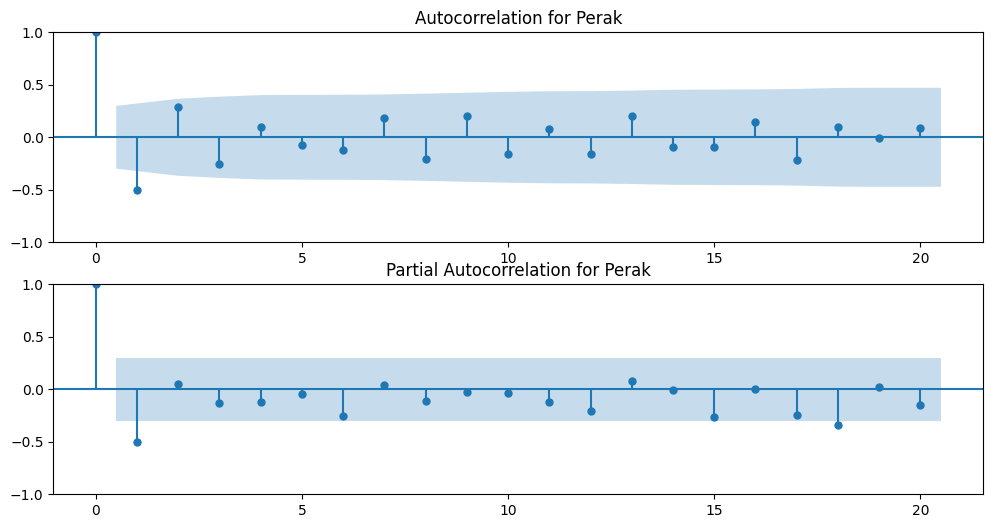

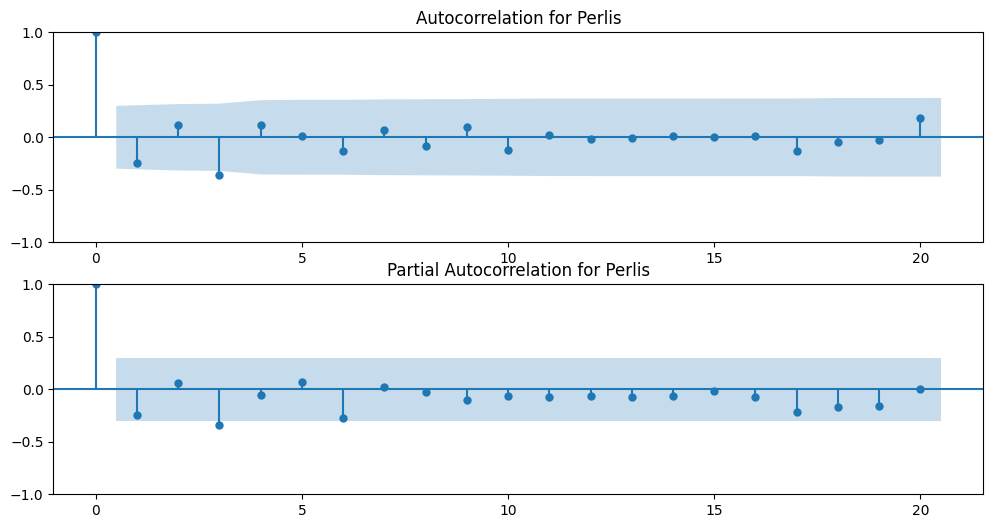

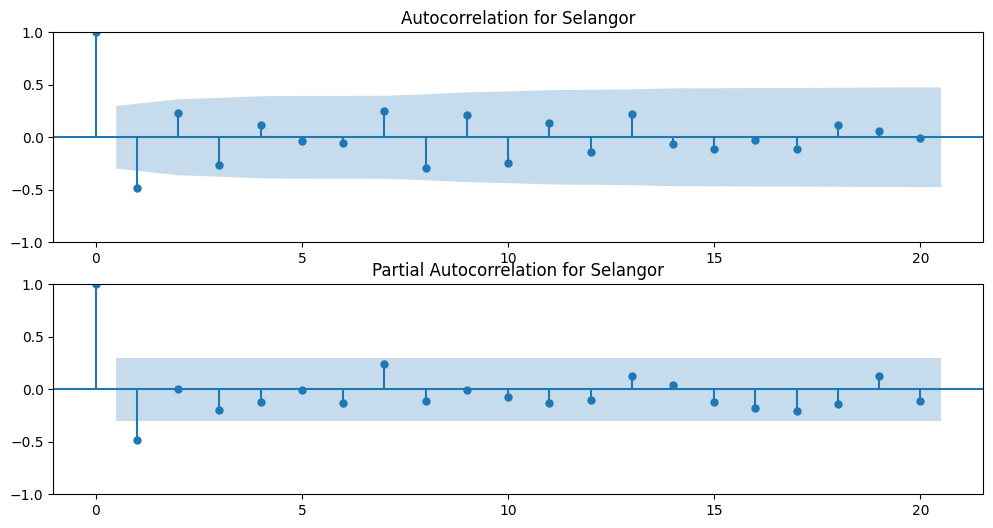

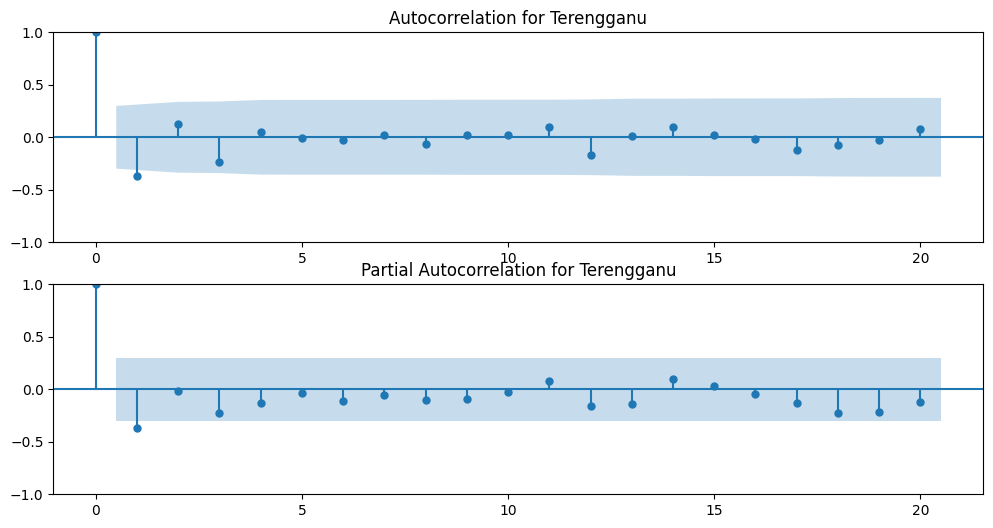

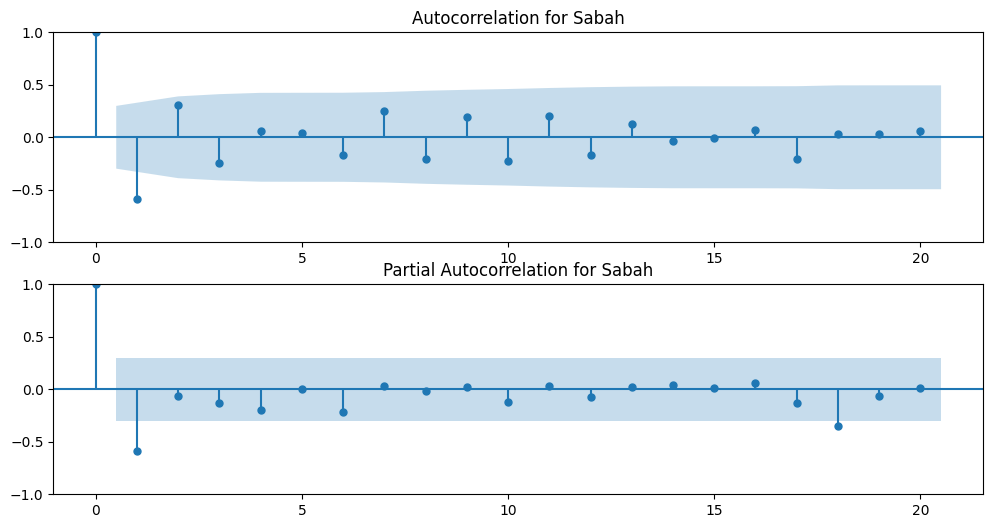

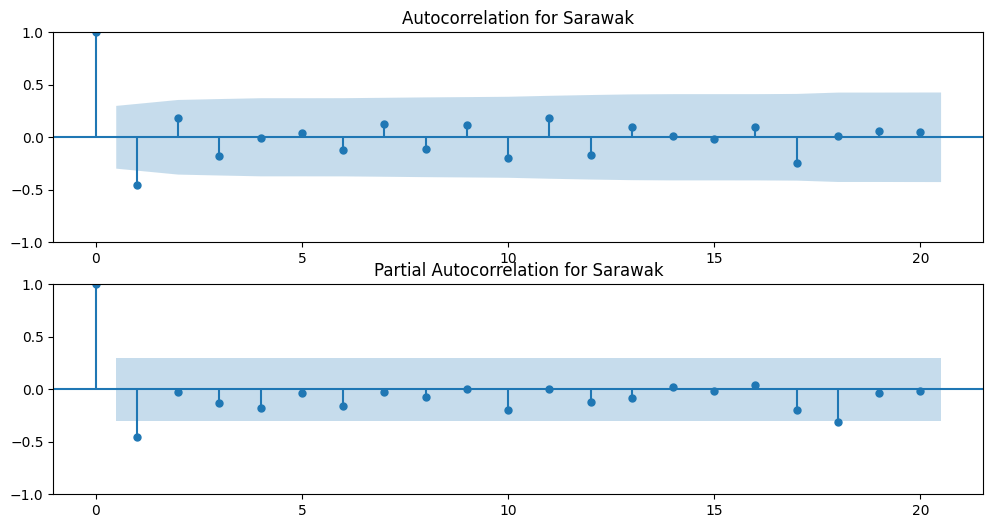

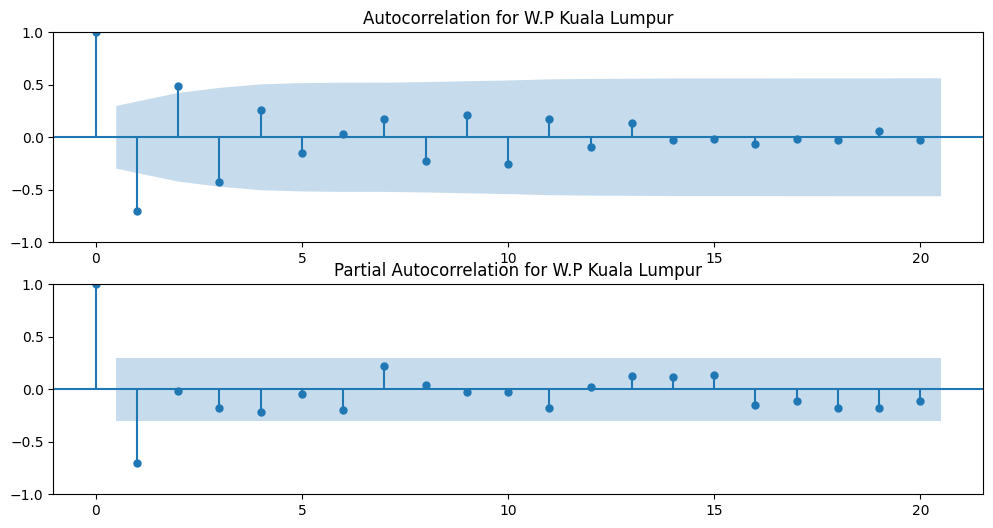

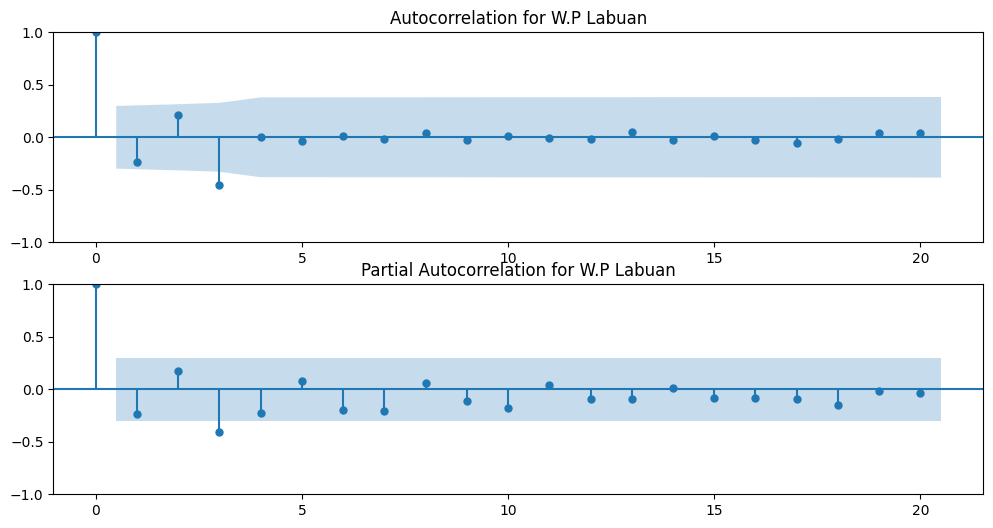

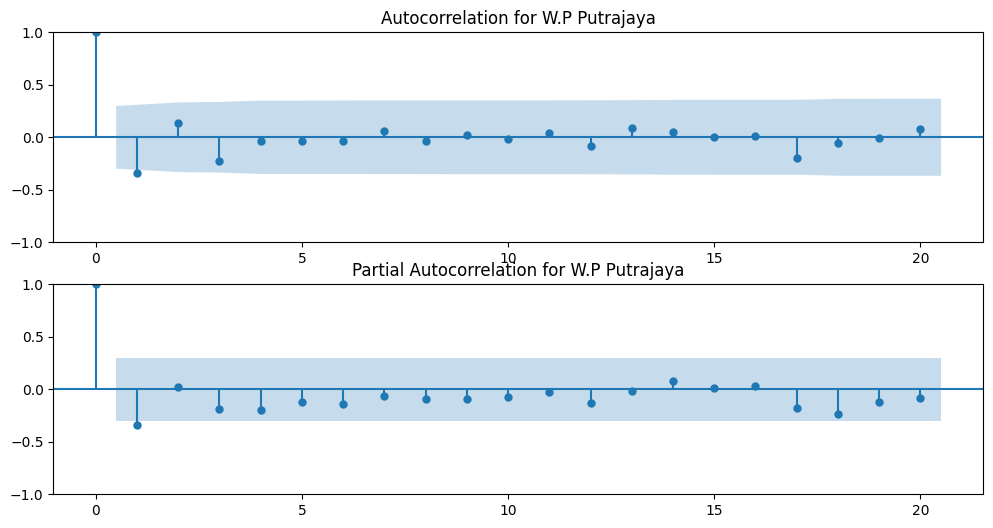

In [283]:
df_diff = df.diff().dropna()

for i in range(df.shape[1]):
    column_name = df.columns[i]
    print(f"Results for {column_name}:")
    print("After differencing:")

    # perform the stationarity test
    adft = adfuller(df_diff.iloc[:, i], autolag='AIC')
    output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
    print(output_df)
    print("\n")

    # autocorrelation
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

    fig, ax = plt.subplots(2, figsize=(12,6))
    ax[0] = plot_acf(df_diff.iloc[:,i], ax=ax[0], lags=20, title= f"Autocorrelation for {column_name}")
    ax[1] = plot_pacf(df_diff.iloc[:,i], ax=ax[1], lags=20, title= f"Partial Autocorrelation for {column_name}")
    

# 5. Fitting the Model

In [284]:
# split the data set into train and test
train = df.iloc[:round(len(df)*0.8)]
test = df.iloc[round(len(df)*0.8):]

## ETS

In [285]:
diff = len(train_diff)- len(test_diff)

model_1 = ExponentialSmoothing(train_diff.iloc[:,0], trend='add', seasonal='add', seasonal_periods=12)  
model_fit_1 = model_1.fit()
forecasts_1 = model_fit_1.forecast(steps= 12)

model_2 = ExponentialSmoothing(train_diff.iloc[:,1], trend='add', seasonal='add', seasonal_periods=12)
model_fit_2 = model_2.fit()
forecasts_2 = model_fit_2.forecast(steps= 12)

model_3 = ExponentialSmoothing(train_diff.iloc[:,2], trend='add', seasonal='add', seasonal_periods=12)
model_fit_3 = model_3.fit()
forecasts_3 = model_fit_3.forecast(steps= 12)

model_4 = ExponentialSmoothing(train_diff.iloc[:,3], trend='add', seasonal='add', seasonal_periods=12)
model_fit_4 = model_4.fit()
forecasts_4 = model_fit_4.forecast(steps= 12)

model_5 = ExponentialSmoothing(train_diff.iloc[:,4], trend='add', seasonal='add', seasonal_periods=12)
model_fit_5 = model_5.fit()
forecasts_5 = model_fit_5.forecast(steps= 12)

model_6 = ExponentialSmoothing(train_diff.iloc[:,5], trend='add', seasonal='add', seasonal_periods=12)
model_fit_6 = model_6.fit()
forecasts_6 = model_fit_6.forecast(steps= 12)

model_7 = ExponentialSmoothing(train_diff.iloc[:,6], trend='add', seasonal='add', seasonal_periods=12)
model_fit_7 = model_7.fit()
forecasts_7 = model_fit_7.forecast(steps= 12)

model_8 = ExponentialSmoothing(train_diff.iloc[:,7], trend='add', seasonal='add', seasonal_periods=12)
model_fit_8 = model_8.fit()
forecasts_8 = model_fit_8.forecast(steps= 12)

model_9 = ExponentialSmoothing(train_diff.iloc[:,8], trend='add', seasonal='add', seasonal_periods=12)
model_fit_9 = model_9.fit()
forecasts_9 = model_fit_9.forecast(steps= 12)

model_10 = ExponentialSmoothing(train_diff.iloc[:,9], trend='add', seasonal='add', seasonal_periods=12)
model_fit_10 = model_10.fit()
forecasts_10 = model_fit_10.forecast(steps= 12)

model_11 = ExponentialSmoothing(train_diff.iloc[:,10], trend='add', seasonal='add', seasonal_periods=12)
model_fit_11 = model_11.fit()
forecasts_11 = model_fit_11.forecast(steps= 12)

model_12 = ExponentialSmoothing(train_diff.iloc[:,11], trend='add', seasonal='add', seasonal_periods=12)
model_fit_12 = model_12.fit()
forecasts_12 = model_fit_12.forecast(steps= 12)

model_13 = ExponentialSmoothing(train_diff.iloc[:,12], trend='add', seasonal='add', seasonal_periods=12)
model_fit_13 = model_13.fit()
forecasts_13 = model_fit_13.forecast(steps= 12)

model_14 = ExponentialSmoothing(train_diff.iloc[:,13], trend='add', seasonal='add', seasonal_periods=12)
model_fit_14 = model_14.fit()
forecasts_14 = model_fit_14.forecast(steps= 12)

model_15 = ExponentialSmoothing(train_diff.iloc[:,14], trend='add', seasonal='add', seasonal_periods=12)
model_fit_15 = model_15.fit()
forecasts_15 = model_fit_15.forecast(steps= 12)

model_16 = ExponentialSmoothing(train_diff.iloc[:,15], trend='add', seasonal='add', seasonal_periods=12)
model_fit_16 = model_16.fit()
forecasts_16 = model_fit_16.forecast(steps= 12)


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be igno

### ETS Accuracy Testing

In [286]:
mae_1 = mean_absolute_error(test_diff.iloc[:,0], forecasts_1)
mse_1 = mean_squared_error(test_diff.iloc[:,0], forecasts_1)
rmse_1 = np.sqrt(mse_1)
print(test_diff.iloc[:,0].name)
print(f"Mean Absolute Error (MAE): {mae_1:.2f}")
print(f"Mean Squared Error (MSE): {mse_1:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_1:.2f}")
print("\n")

mae_2 = mean_absolute_error(test_diff.iloc[:,1], forecasts_2)
mse_2 = mean_squared_error(test_diff.iloc[:,1], forecasts_2)
rmse_2 = np.sqrt(mse_2)
print(test_diff.iloc[:,1].name)
print(f"Mean Absolute Error (MAE): {mae_2:.2f}")
print(f"Mean Squared Error (MSE): {mse_2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_2:.2f}")
print("\n")

mae_3 = mean_absolute_error(test_diff.iloc[:,2], forecasts_3)
mse_3 = mean_squared_error(test_diff.iloc[:,2], forecasts_3)
rmse_3 = np.sqrt(mse_3)
print(test_diff.iloc[:,2].name)
print(f"Mean Absolute Error (MAE): {mae_3:.2f}")
print(f"Mean Squared Error (MSE): {mse_3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_3:.2f}")
print("\n")

mae_4 = mean_absolute_error(test_diff.iloc[:,3], forecasts_4)
mse_4 = mean_squared_error(test_diff.iloc[:,3], forecasts_4)
rmse_4 = np.sqrt(mse_4)
print(test_diff.iloc[:,3].name)
print(f"Mean Absolute Error (MAE): {mae_4:.2f}")
print(f"Mean Squared Error (MSE): {mse_4:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_4:.2f}")
print("\n")

mae_5 = mean_absolute_error(test_diff.iloc[:,4], forecasts_5)
mse_5 = mean_squared_error(test_diff.iloc[:,4], forecasts_5)
rmse_5 = np.sqrt(mse_5)
print(test_diff.iloc[:,4].name)
print(f"Mean Absolute Error (MAE): {mae_5:.2f}")
print(f"Mean Squared Error (MSE): {mse_5:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_5:.2f}")
print("\n")

mae_6 = mean_absolute_error(test_diff.iloc[:,5], forecasts_6)
mse_6 = mean_squared_error(test_diff.iloc[:,5], forecasts_6)
rmse_6 = np.sqrt(mse_6)
print(test_diff.iloc[:,5].name)
print(f"Mean Absolute Error (MAE): {mae_6:.2f}")
print(f"Mean Squared Error (MSE): {mse_6:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_6:.2f}")
print("\n")

mae_7 = mean_absolute_error(test_diff.iloc[:,6], forecasts_7)
mse_7 = mean_squared_error(test_diff.iloc[:,6], forecasts_7)
rmse_7 = np.sqrt(mse_7)
print(test_diff.iloc[:,6].name)
print(f"Mean Absolute Error (MAE): {mae_7:.2f}")
print(f"Mean Squared Error (MSE): {mse_7:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_7:.2f}")
print("\n")

mae_8 = mean_absolute_error(test_diff.iloc[:,7], forecasts_8)
mse_8 = mean_squared_error(test_diff.iloc[:,7], forecasts_8)
rmse_8 = np.sqrt(mse_8)
print(test_diff.iloc[:,7].name)
print(f"Mean Absolute Error (MAE): {mae_8:.2f}")
print(f"Mean Squared Error (MSE): {mse_8:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_8:.2f}")
print("\n")

mae_9 = mean_absolute_error(test_diff.iloc[:,8], forecasts_9)
mse_9 = mean_squared_error(test_diff.iloc[:,8], forecasts_9)
rmse_9 = np.sqrt(mse_9)
print(test_diff.iloc[:,8].name)
print(f"Mean Absolute Error (MAE): {mae_9:.2f}")
print(f"Mean Squared Error (MSE): {mse_9:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_9:.2f}")
print("\n")

mae_10 = mean_absolute_error(test_diff.iloc[:,9], forecasts_10)
mse_10 = mean_squared_error(test_diff.iloc[:,9], forecasts_10)
rmse_10 = np.sqrt(mse_10)
print(test_diff.iloc[:,9].name)
print(f"Mean Absolute Error (MAE): {mae_10:.2f}")
print(f"Mean Squared Error (MSE): {mse_10:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_10:.2f}")
print("\n")

mae_11 = mean_absolute_error(test_diff.iloc[:,10], forecasts_11)
mse_11 = mean_squared_error(test_diff.iloc[:,10], forecasts_11)
rmse_11 = np.sqrt(mse_11)
print(test_diff.iloc[:,10].name)
print(f"Mean Absolute Error (MAE): {mae_11:.2f}")
print(f"Mean Squared Error (MSE): {mse_11:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_11:.2f}")
print("\n")

mae_12 = mean_absolute_error(test_diff.iloc[:,11], forecasts_12)
mse_12 = mean_squared_error(test_diff.iloc[:,11], forecasts_12)
rmse_12 = np.sqrt(mse_12)
print(test_diff.iloc[:,11].name)
print(f"Mean Absolute Error (MAE): {mae_12:.2f}")
print(f"Mean Squared Error (MSE): {mse_12:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_12:.2f}")
print("\n")

mae_13 = mean_absolute_error(test_diff.iloc[:,12], forecasts_13)
mse_13 = mean_squared_error(test_diff.iloc[:,12], forecasts_13)
rmse_13 = np.sqrt(mse_13)
print(test_diff.iloc[:,12].name)
print(f"Mean Absolute Error (MAE): {mae_13:.2f}")
print(f"Mean Squared Error (MSE): {mse_13:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_13:.2f}")
print("\n")

mae_14 = mean_absolute_error(test_diff.iloc[:,13], forecasts_14)
mse_14 = mean_squared_error(test_diff.iloc[:,13], forecasts_14)
rmse_14 = np.sqrt(mse_14)
print(test_diff.iloc[:,13].name)
print(f"Mean Absolute Error (MAE): {mae_14:.2f}")
print(f"Mean Squared Error (MSE): {mse_14:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_14:.2f}")
print("\n")

mae_15 = mean_absolute_error(test_diff.iloc[:,14], forecasts_15)
mse_15 = mean_squared_error(test_diff.iloc[:,14], forecasts_15)
rmse_15 = np.sqrt(mse_15)
print(test_diff.iloc[:,14].name)
print(f"Mean Absolute Error (MAE): {mae_15:.2f}")
print(f"Mean Squared Error (MSE): {mse_15:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_15:.2f}")
print("\n")

mae_16 = mean_absolute_error(test_diff.iloc[:,15], forecasts_16)
mse_16 = mean_squared_error(test_diff.iloc[:,15], forecasts_16)
rmse_16 = np.sqrt(mse_16)
print(test_diff.iloc[:,15].name)
print(f"Mean Absolute Error (MAE): {mae_16:.2f}")
print(f"Mean Squared Error (MSE): {mse_16:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_16:.2f}")


Johor
Mean Absolute Error (MAE): 1232.78
Mean Squared Error (MSE): 2695136.68
Root Mean Squared Error (RMSE): 1641.69


Kedah
Mean Absolute Error (MAE): 283.86
Mean Squared Error (MSE): 128110.20
Root Mean Squared Error (RMSE): 357.92


Kelantan
Mean Absolute Error (MAE): 304.35
Mean Squared Error (MSE): 126588.75
Root Mean Squared Error (RMSE): 355.79


Melaka
Mean Absolute Error (MAE): 306.02
Mean Squared Error (MSE): 156032.86
Root Mean Squared Error (RMSE): 395.01


Negeri Sembilan
Mean Absolute Error (MAE): 197.38
Mean Squared Error (MSE): 56105.62
Root Mean Squared Error (RMSE): 236.87


Pahang
Mean Absolute Error (MAE): 158.92
Mean Squared Error (MSE): 43838.51
Root Mean Squared Error (RMSE): 209.38


Pulau Pinang
Mean Absolute Error (MAE): 565.88
Mean Squared Error (MSE): 558788.99
Root Mean Squared Error (RMSE): 747.52


Perak
Mean Absolute Error (MAE): 335.65
Mean Squared Error (MSE): 177700.29
Root Mean Squared Error (RMSE): 421.55


Perlis
Mean Absolute Error (MAE): 134.77


In [287]:
# combine all the forecast set
forecast = pd.concat([forecasts_1, forecasts_2, forecasts_3, forecasts_4, forecasts_5, forecasts_6, forecasts_7, forecasts_8, forecasts_9, forecasts_10, forecasts_11, forecasts_12, forecasts_13, forecasts_14, forecasts_15, forecasts_16], axis=1)

# rename the column name
for i in range(df.shape[1]):
    column_name = df.columns[i]
    column_data = df.iloc[:, i]  # Access column data using iloc
    forecast = forecast.rename(columns={i: column_name})

forecast

Johor        Kedah     Kelantan       Melaka  Negeri Sembilan  \
32  3665.315397   451.010831   329.753730   838.924005       271.191583   
33  3371.236174   421.980052   388.387875   833.591362       275.612008   
34  3398.663552   483.900439   484.598372   834.670376       315.487405   
35  5061.942820   791.047985   711.190528  1211.017720       558.175993   
36  5170.853618   761.685028   691.024772  1172.924168       567.414068   
37  5489.547488   776.244996   795.075989  1310.456538       662.011378   
38  5497.882707   774.970850   689.822086  1259.035031       580.686887   
39  5075.592069  1040.861525  1035.368681  1248.161285       661.288290   
40  5716.284929  1037.178359   924.906155  1412.226924       686.286239   
41  5076.970543   932.759465   976.165610  1288.473836       644.080102   
42  4791.132830   523.893937   480.047737  1127.674500       370.307453   
43  4781.999111   479.358113   494.409577  1133.604626       412.336193   

        Pahang  Pulau Pinang       Perak      Perlis     Selangor  Terengganu  \
32  319.145740   1812.734369  467.562184   77.306737  6786.084709  297.853471   
33  314.938822   1502.530785  278.301115   85.954549  5466.103840  296.320751   
34  320.741202   1471.725421  191.283712   87.317890  5237.208828  306.834443   
35  504.999569   2457.034589  598.848616  171.663730  8612.411381  422.962112   
36  472.790493   2557.445845  556.580606  174.700651  8344.478790  425.743585   
37  546.512600   2653.337576  602.367307  156.788858  9106.757010  482.605971   
38  493.248904   2732.835827  571.380461  146.324611  8086.837036  410.377730   
39  544.339546   2331.623019  541.953215  284.856667  7704.520644  466.676069   
40  528.658920   2647.264886  755.117581  317.137429  9196.171894  520.896123   
41  519.680300   2380.770503  567.350453  260.992993  7447.895168  512.505104   
42  385.754906   2250.920547  602.394617  135.518147  7636.399486  379.524581   
43  332.238075   2425.580187  562.310125   89.298795  9100.875544  369.966615   

          Sabah      Sarawak  W.P Kuala Lumpur  W.P Labuan  W.P Putrajaya  
32   592.331378   683.355282      23550.828774   19.489953     172.804648  
33   562.058145   619.231047      22394.762199   26.216953     160.045436  
34   535.749841   526.732797      22062.605102   36.103910     157.234966  
35  1073.281879  1288.791701      30894.537578   60.764258     249.672440  
36   998.117634  1124.998115      31629.528326   55.658566     275.230523  
37   997.894957  1121.612336      33257.360749   54.340318     300.807464  
38   929.799436   995.805838      32232.973027   50.085355     292.666031  
39   880.989256   918.131684      31043.151192  148.470871     349.055797  
40  1000.249586  1058.724139      33012.369650  131.040071     363.008351  
41   992.250114  1025.052056      31264.517273  138.583564     380.869625  
42   878.728447   864.551720      32996.431746   38.777014     261.233536  
43   873.485784   840.461183      34045.526529   35.653242     267.032389

## Plotting of ETS Model Result

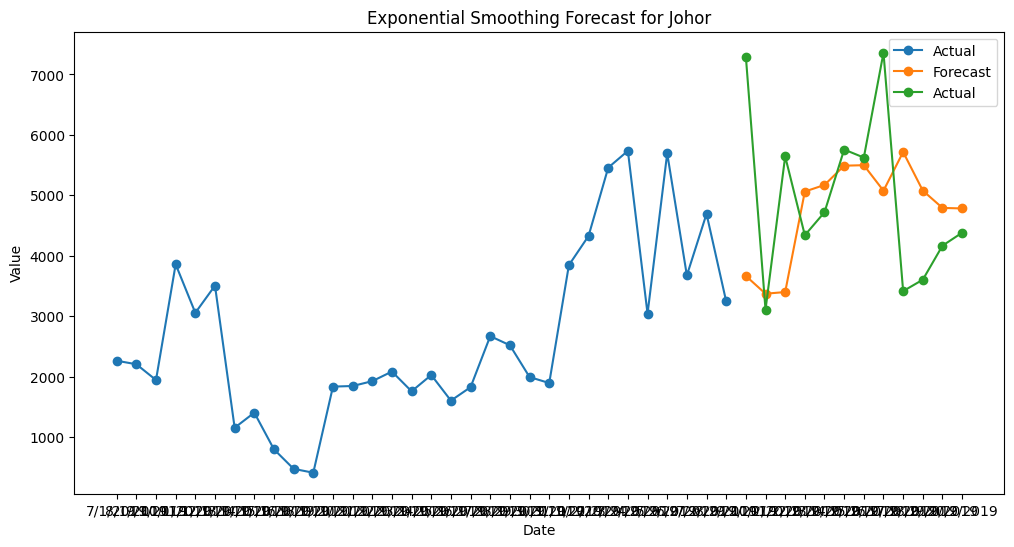

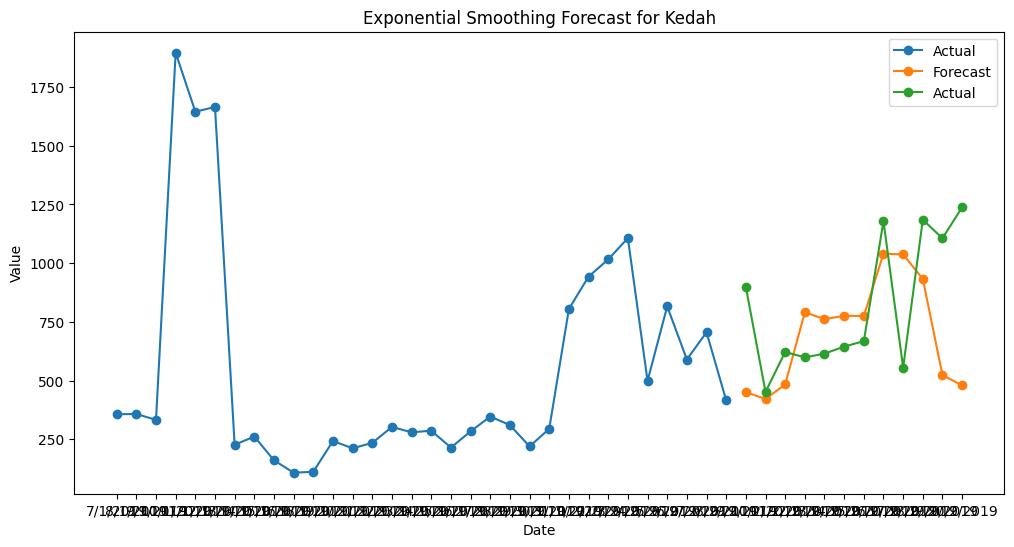

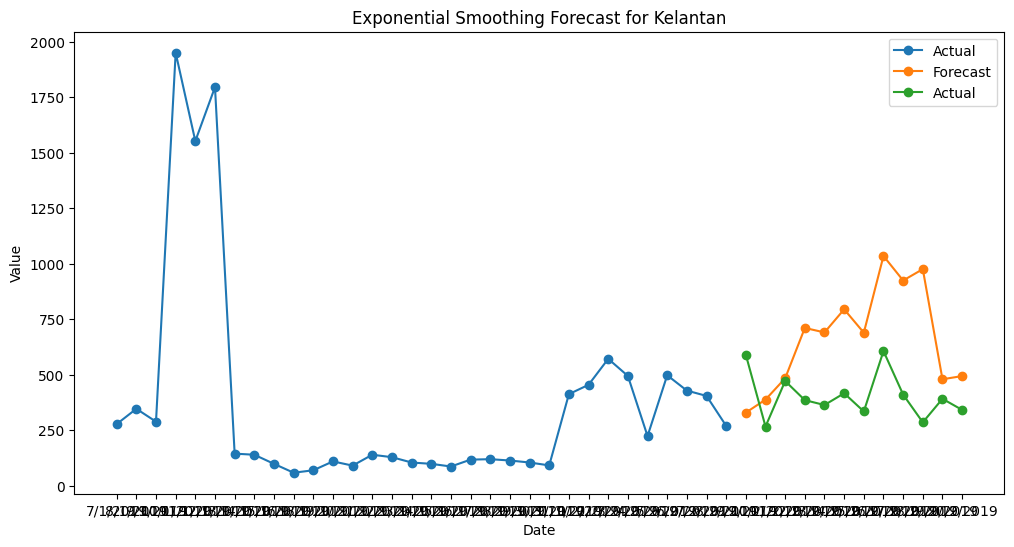

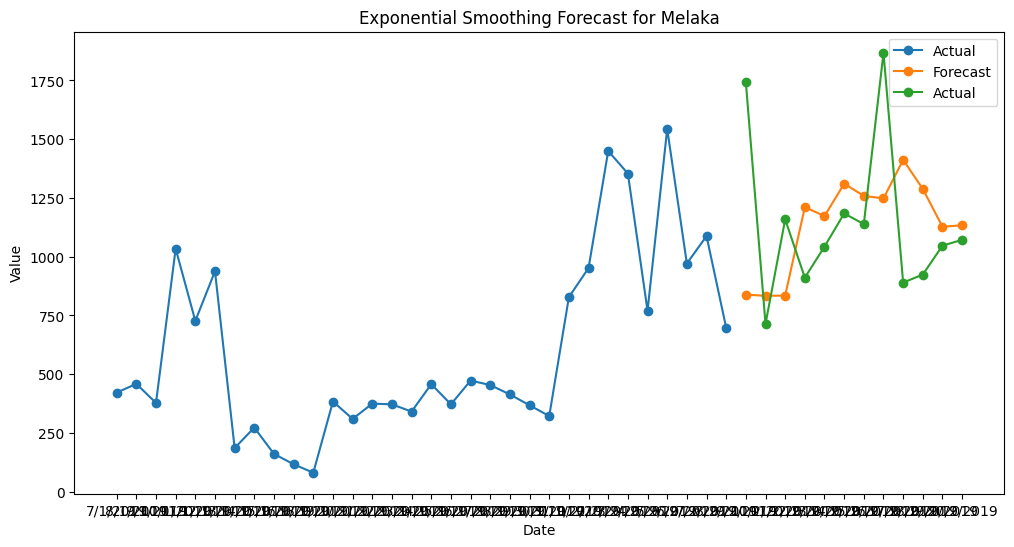

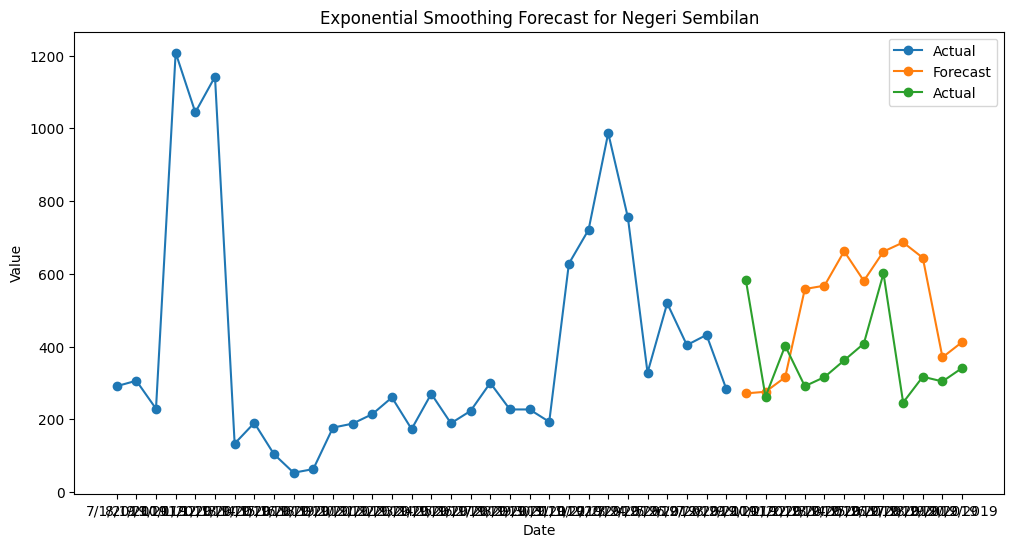

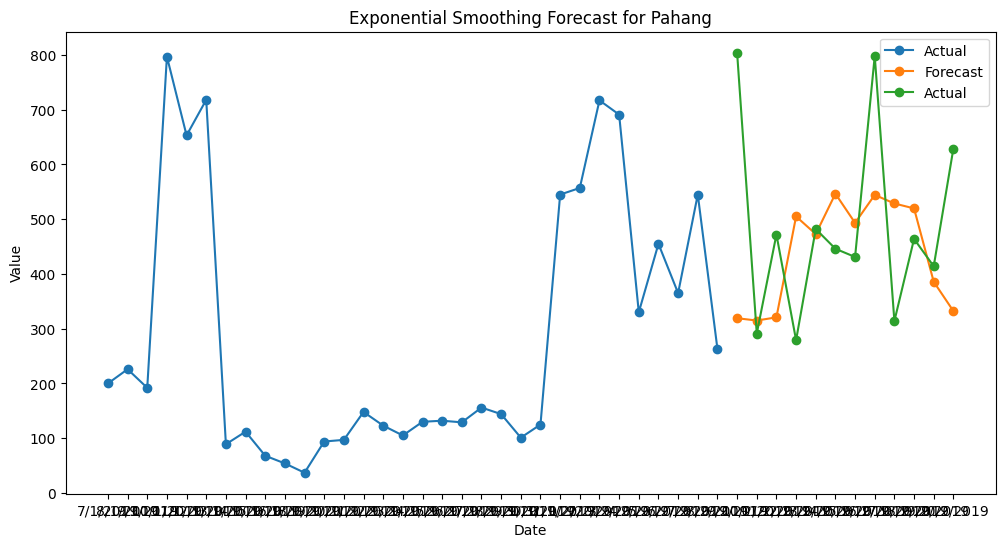

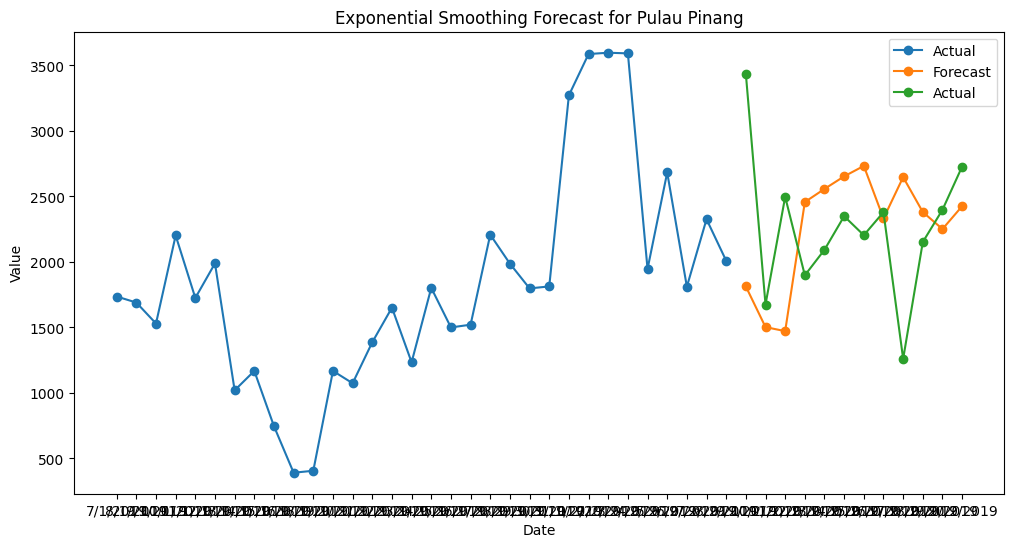

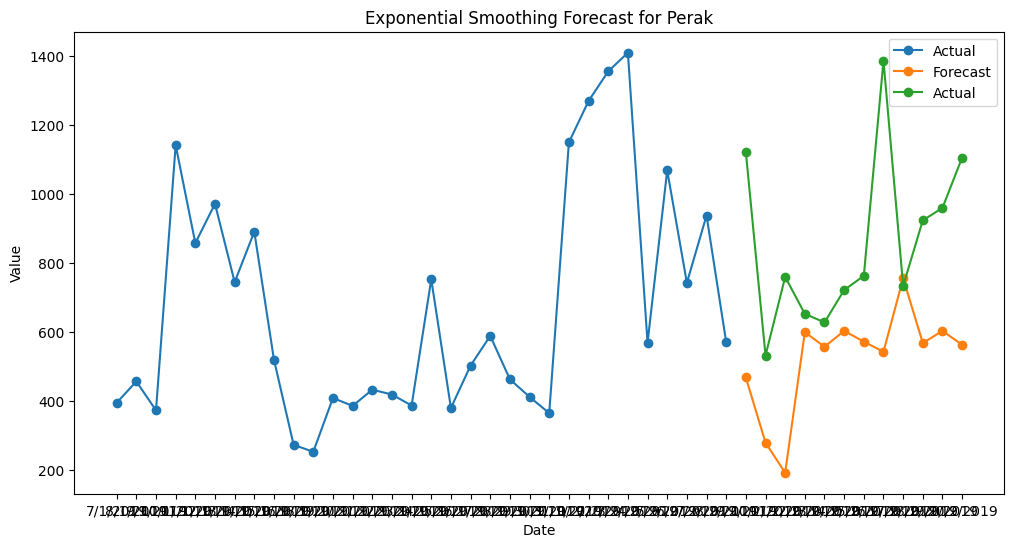

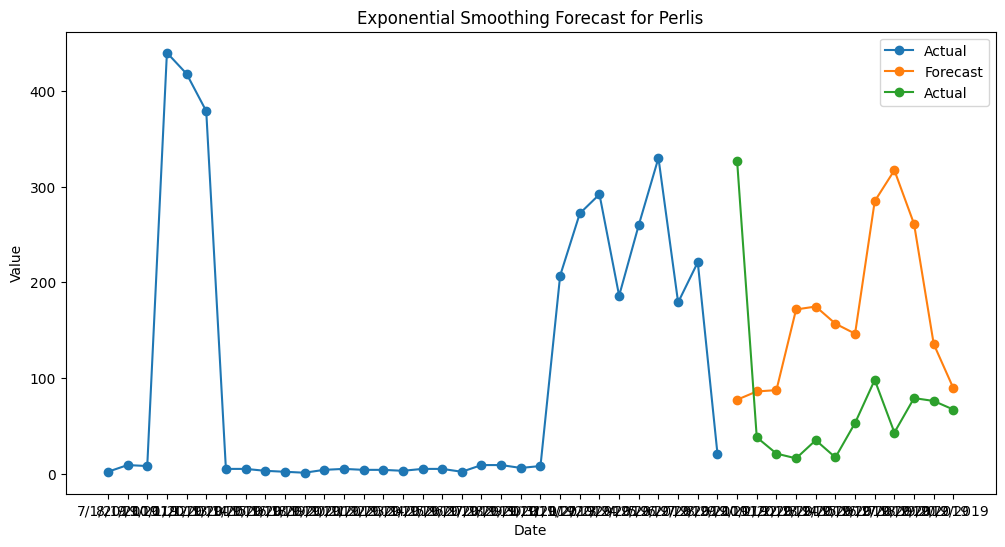

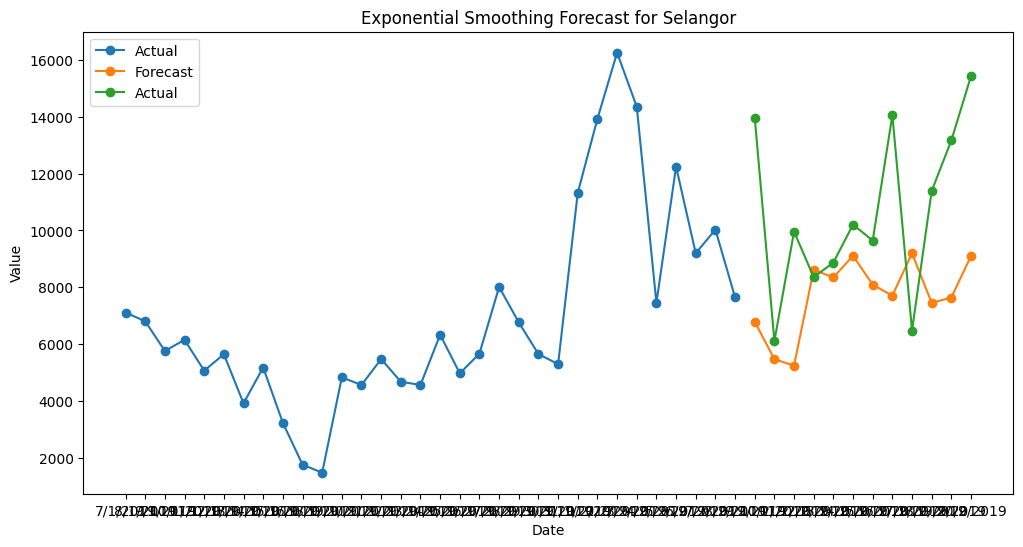

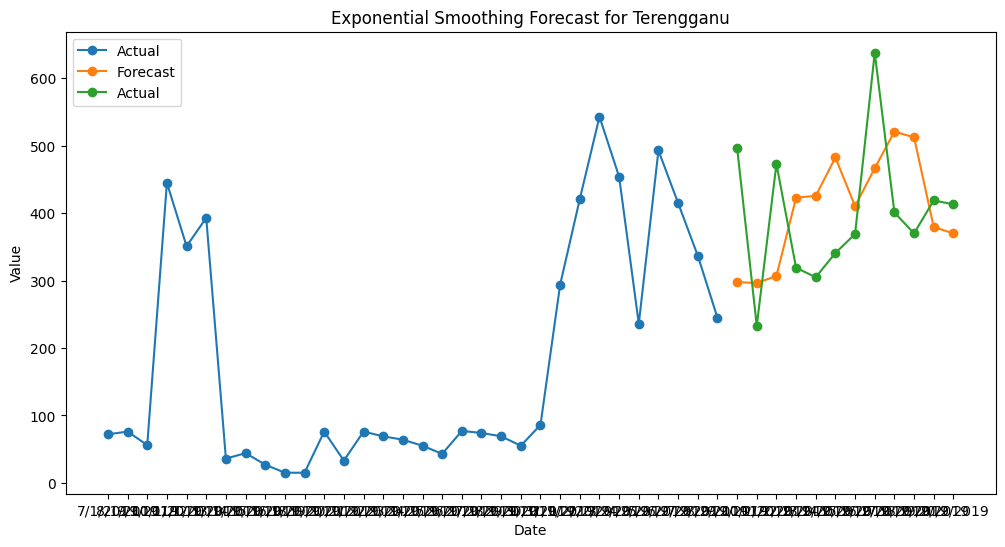

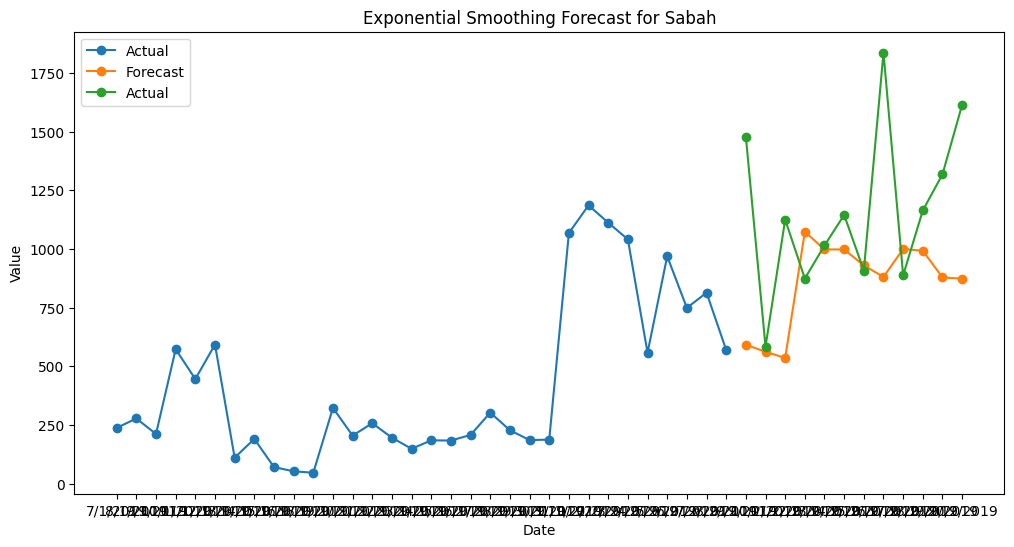

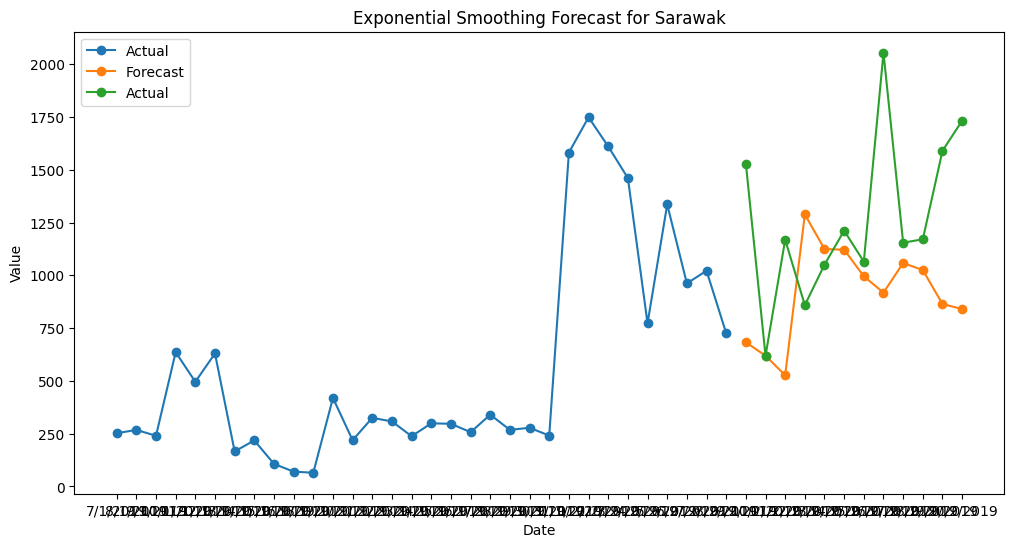

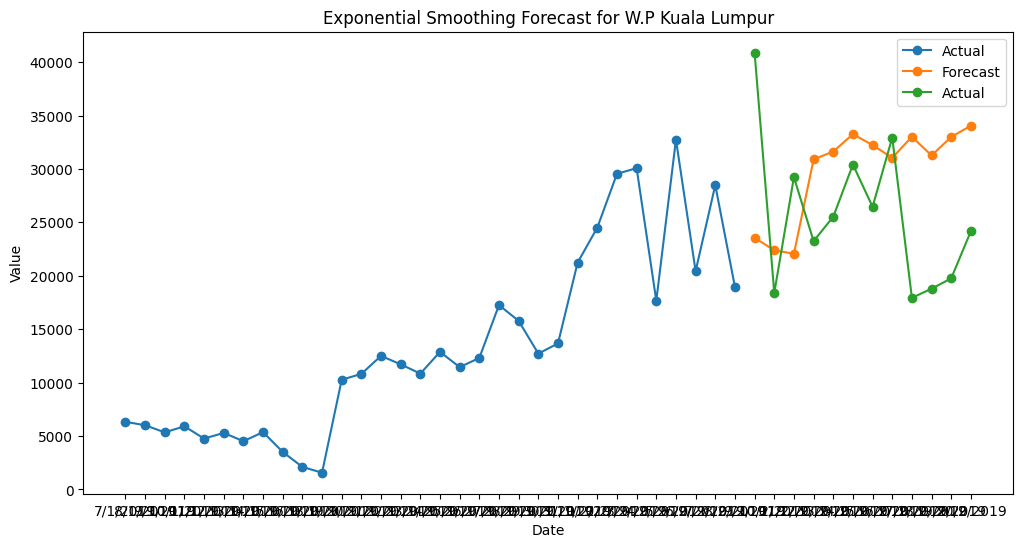

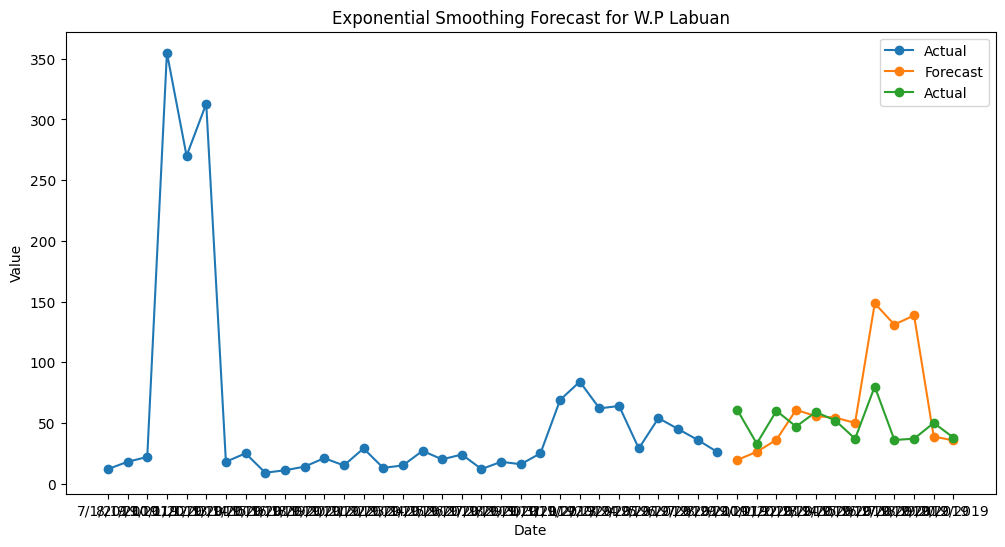

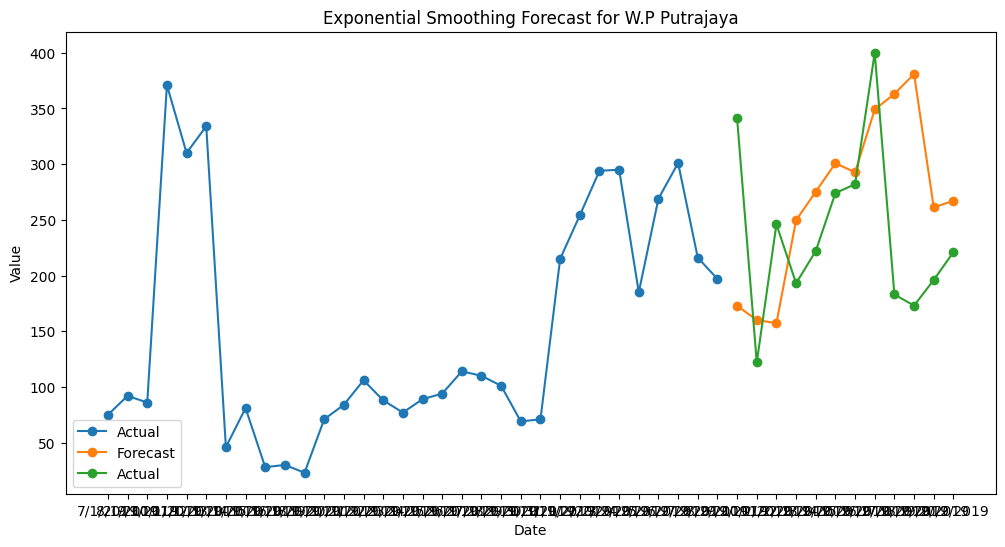

In [288]:
for i in range(df.shape[1]):
    column_name = df.columns[i]
    column_data = df.iloc[:, i]  # Access column data using iloc

    plt.figure(figsize=(12, 6))
    plt.plot(train_diff.iloc[:,i], label='Actual', linestyle='-', marker='o')
    plt.plot(forecast.iloc[:,i], label='Forecast', linestyle='-', marker='o')
    plt.legend()
    plt.plot(test_diff.iloc[:,i], label='Actual', linestyle='-', marker='o') 
    plt.legend()
    plt.title(f'Exponential Smoothing Forecast for {column_name}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.show()



## ARIMA test

In [289]:
ARIMA_forecast = []
ARIMA_forecast = pd.DataFrame(ARIMA_forecast)

for i in range(df.shape[1]):
    column_name = df.columns[i]
    print(f"Results for {column_name}:")

    ARIMAmodel = auto_arima(train_diff[[column_name]], trace=True, error_action='ignore', suppress_warnings=True)
    ARIMAmodel.fit(train_diff[[column_name]])
    forecast = ARIMAmodel.predict(n_periods=len(test_diff))
    print(forecast)
    ARIMA_forecast = pd.concat([ARIMA_forecast, forecast], axis=1)

Results for Johor:
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=527.325, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=528.958, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=522.890, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=524.908, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=526.982, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=524.453, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=524.524, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=521.107, Time=0.67 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=522.608, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=522.578, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=523.169, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=524.534, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 1.239 seconds
32    3927.415159
33

c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=487.940, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=476.227, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=480.837, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=513.185, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=478.054, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=478.155, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=478.954, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=479.399, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.533 seconds
32    462.666247
33    489.793308
34    505.562252
35    514.728729
36    520.057197
37    523.154632
38    524.955169
39    526.001821
40    526.610238
41    526.963911
42    527.169501
43    527.289010
dtype: float64
Results for Kelantan:
Performing stepwise search to minimize aic


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=489.392, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=478.432, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=483.321, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=502.433, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=480.425, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=480.433, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=479.945, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.649 seconds
32    308.682321
33    330.693266
34    343.217895
35    350.344636
36    354.399882
37    356.707391
38    358.020405
39    358.767534
40    359.192664
41    359.434571
42    359.572220
43    359.650545
dtype: float64
Results for Melaka:
Performing stepwise search to minimize aic


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=460.264, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=475.804, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=460.510, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=469.164, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=512.947, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=458.864, Time=0.19 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=458.439, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=459.384, Time=0.35 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=460.363, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=460.236, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 1.158 seconds


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


32    518.387308
33    629.041957
34    594.947716
35    594.947716
36    594.947716
37    594.947716
38    594.947716
39    594.947716
40    594.947716
41    594.947716
42    594.947716
43    594.947716
dtype: float64
Results for Negeri Sembilan:
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=462.892, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=452.259, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=456.488, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=490.627, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=454.192, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=454.246, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=455.216, Time=0.12 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=456.025, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.791 seconds
32    326.155496
33    349.962490
34    363.407308


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=429.281, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=443.915, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=429.818, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=436.307, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=470.953, Time=0.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=427.287, Time=0.15 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=425.684, Time=0.13 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=427.297, Time=0.11 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=431.784, Time=0.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=429.502, Time=0.18 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=437.843, Time=0.21 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 1.070 seconds


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


32    236.554039
33    176.402299
34    281.970571
35    281.970571
36    281.970571
37    281.970571
38    281.970571
39    281.970571
40    281.970571
41    281.970571
42    281.970571
43    281.970571
dtype: float64
Results for Pulau Pinang:
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=502.008, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=523.492, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=499.949, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=512.546, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=579.329, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=500.270, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=500.991, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=501.436, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=504.098, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.621 seconds


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


32    1960.035269
33    1923.702354
34    1896.742526
35    1876.737736
36    1861.893738
37    1850.879163
38    1842.706104
39    1836.641513
40    1832.141452
41    1828.802308
42    1826.324588
43    1824.486065
dtype: float64
Results for Perak:
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=460.440, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=466.165, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=457.481, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=461.982, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=516.226, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=458.130, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=458.817, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=459.007, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=463.789, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.535 seconds
32    614.126727
33    636.987051
34    648.8

c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=412.996, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=397.874, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=402.899, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=424.231, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=398.901, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=399.375, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=397.708, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=399.085, Time=0.19 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=398.693, Time=0.16 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=401.849, Time=0.11 sec

Best model:  ARIMA(2,0,1)(0,0,0)[0] intercept
Total fit time: 1.359 seconds
32    -32.744419
33    -58.183514
34    -59.948951
35    -44.284781
36    -17.849002
37   

c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=574.577, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=575.542, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=575.614, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=572.579, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.951 seconds
32    7643.0
33    7643.0
34    7643.0
35    7643.0
36    7643.0
37    7643.0
38    7643.0
39    7643.0
40    7643.0
41    7643.0
42    7643.0
43    7643.0
dtype: float64
Results for Terengganu:
Performing stepwise search to minimize aic


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=406.283, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=423.508, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=403.002, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=412.246, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=445.479, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=405.001, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=405.002, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=406.059, Time=0.22 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=404.559, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.137 seconds
32    224.755637
33    210.520570
34    200.511011
35    193.472669
36    188.523574
37    185.043558
38    182.596543
39    180.875895
40    179.666001
41    178.815249
42    178.217032
43    177.796389
dtype: float64
Results for Sabah:
Performing stepwise search to minimize aic


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=432.946, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=433.135, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=433.335, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=431.005, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=434.263, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.721 seconds
32    570.0
33    570.0
34    570.0
35    570.0
36    570.0
37    570.0
38    570.0
39    570.0
40    570.0
41    570.0
42    570.0
43    570.0
dtype: float64
Results for Sarawak:
Performing stepwise search to minimize aic


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=452.722, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=453.615, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=453.726, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=450.786, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=455.215, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.757 seconds
32    726.0
33    726.0
34    726.0
35    726.0
36    726.0
37    726.0
38    726.0
39    726.0
40    726.0
41    726.0
42    726.0
43    726.0
dtype: float64
Results for W.P Kuala Lumpur:
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=618.729, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=625.038, Time=0.01 sec


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=613.152, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=615.178, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=623.228, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=615.075, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=615.147, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=616.963, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=612.634, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=614.337, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=614.391, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=617.049, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=616.344, Time=0.03 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.444 seconds
32    24621.540043
33    21251.732013
34    23255.353703
35    22064.039587
36    22772.371569
37    22351.211280
38    22601.624918
39    22452.733886
40    22541.261570
41    22488.624747
42    22519.921569

c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=374.476, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=388.688, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=372.711, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=372.715, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=372.597, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=371.559, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.411 seconds
32    38.717907
33    45.437536
34    48.987918
35    50.863796
36    51.854935
37    52.378613
38    52.655303
39    52.801495
40    52.878737
41    52.919548
42    52.941112
43    52.952505
dtype: float64


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Results for W.P Putrajaya:
Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=390.583, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=375.651, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=382.337, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=425.364, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=377.650, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=377.651, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=377.760, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=379.297, Time=0.00 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.846 seconds
32    179.172359
33    167.823334
34    160.598577
35    155.999318
36    153.071443
37    151.207566
38    150.021028
39    149.265681
40    148.784829
41    148.478720
42    148.283852
43    148.159800
dtype: float64


c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\TAN YU JING\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


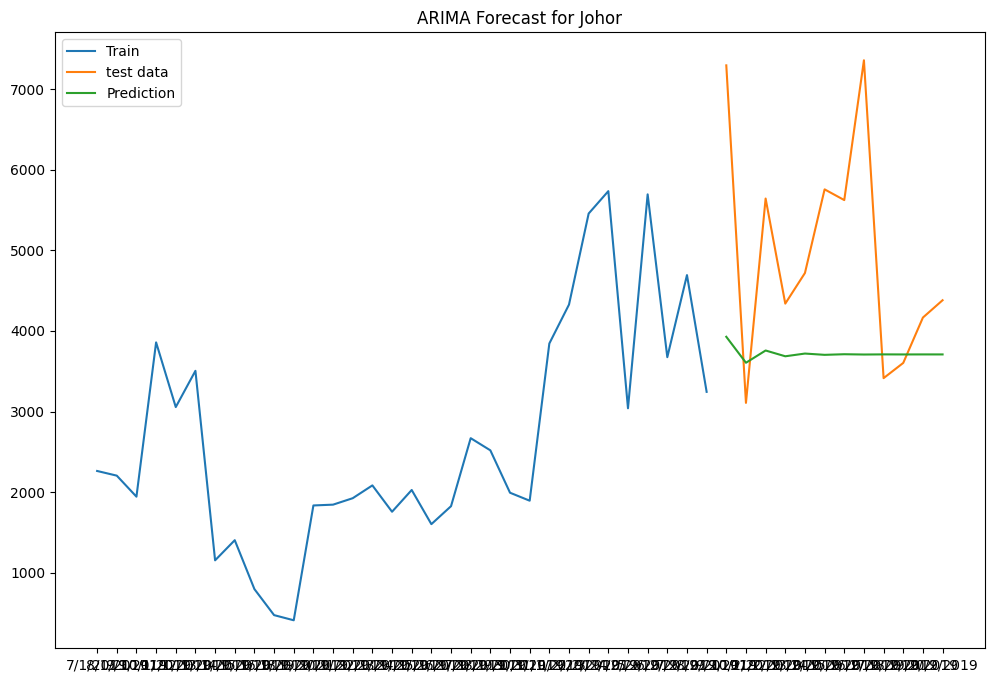

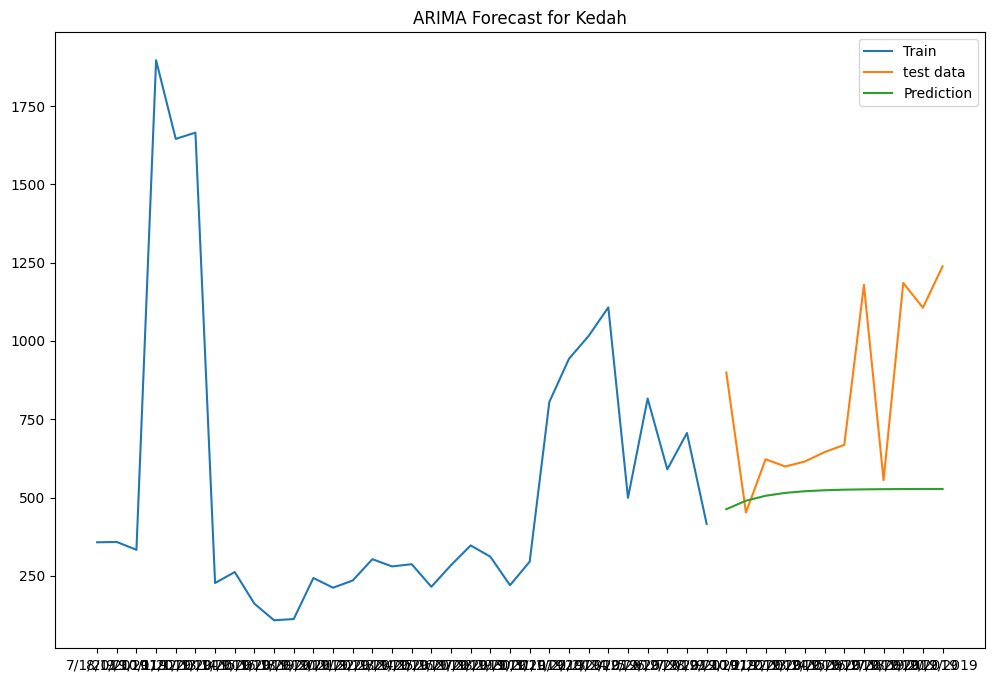

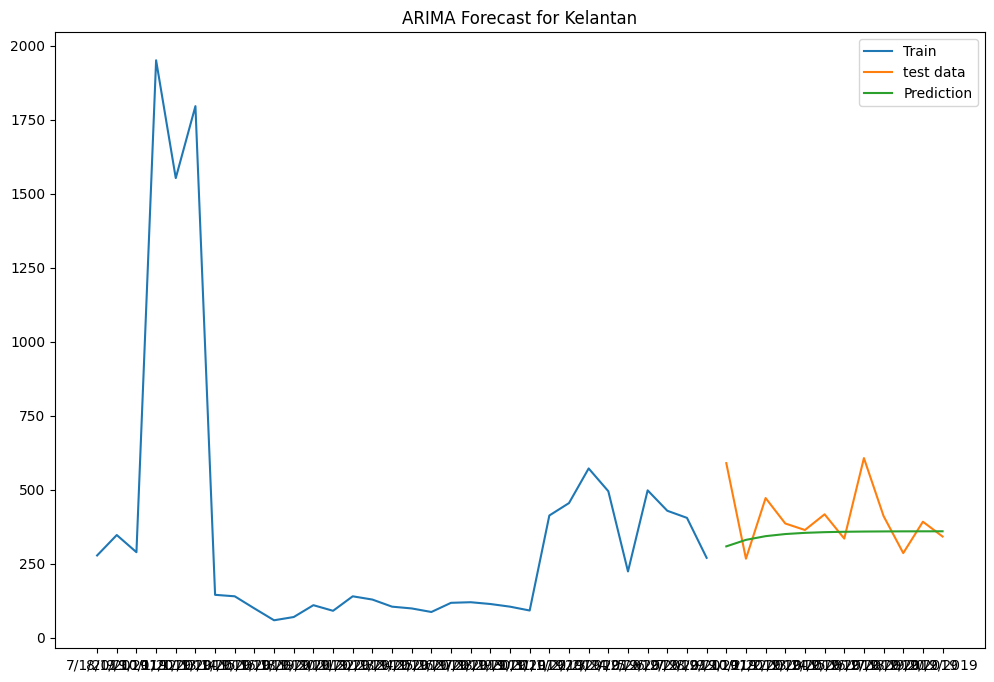

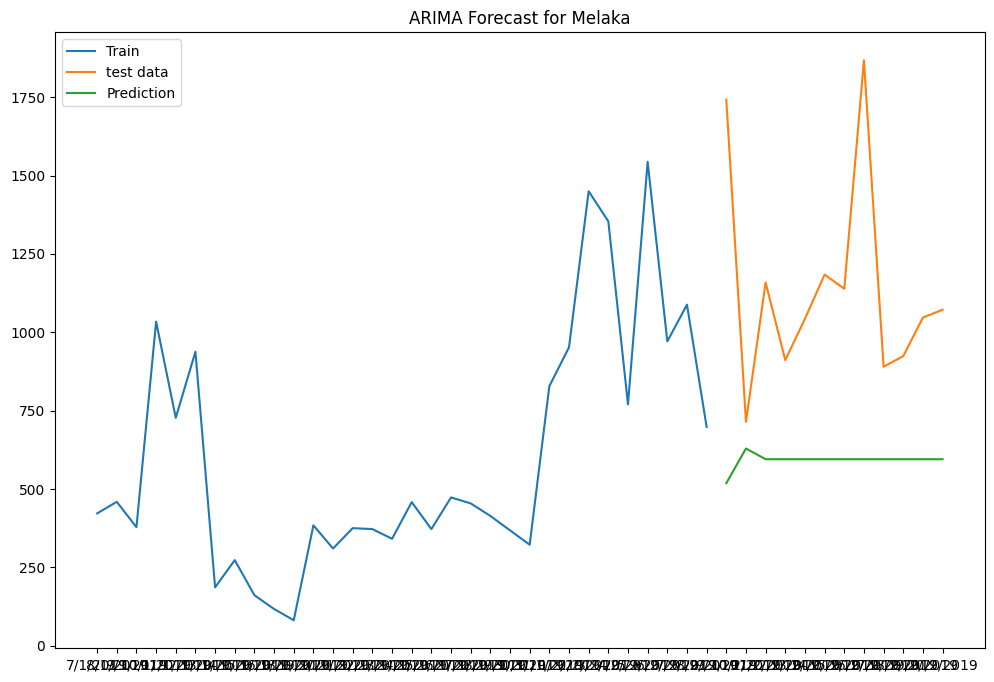

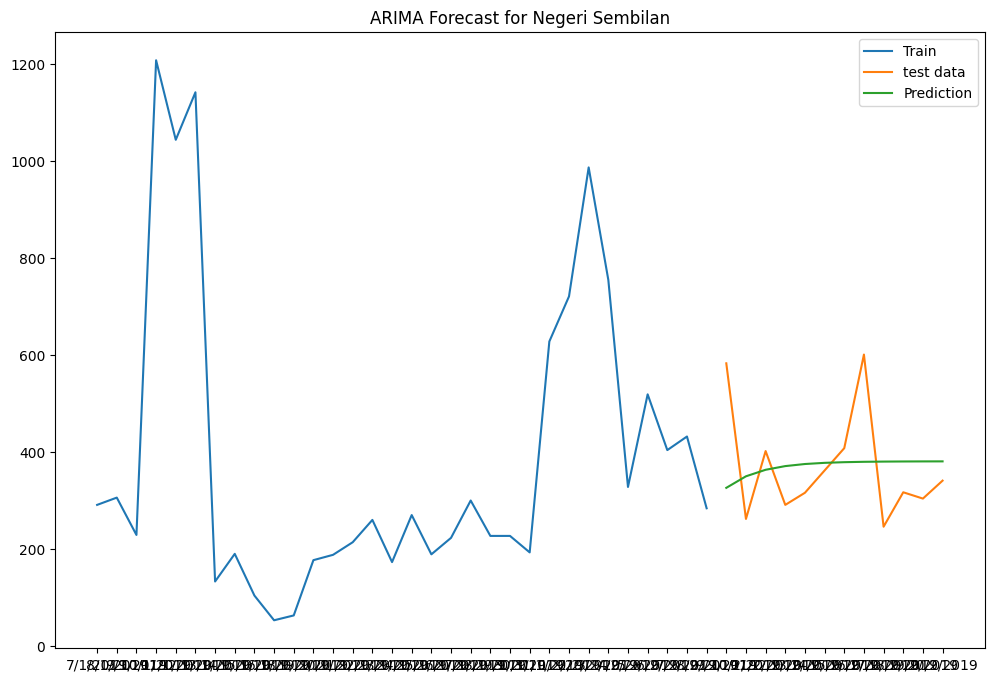

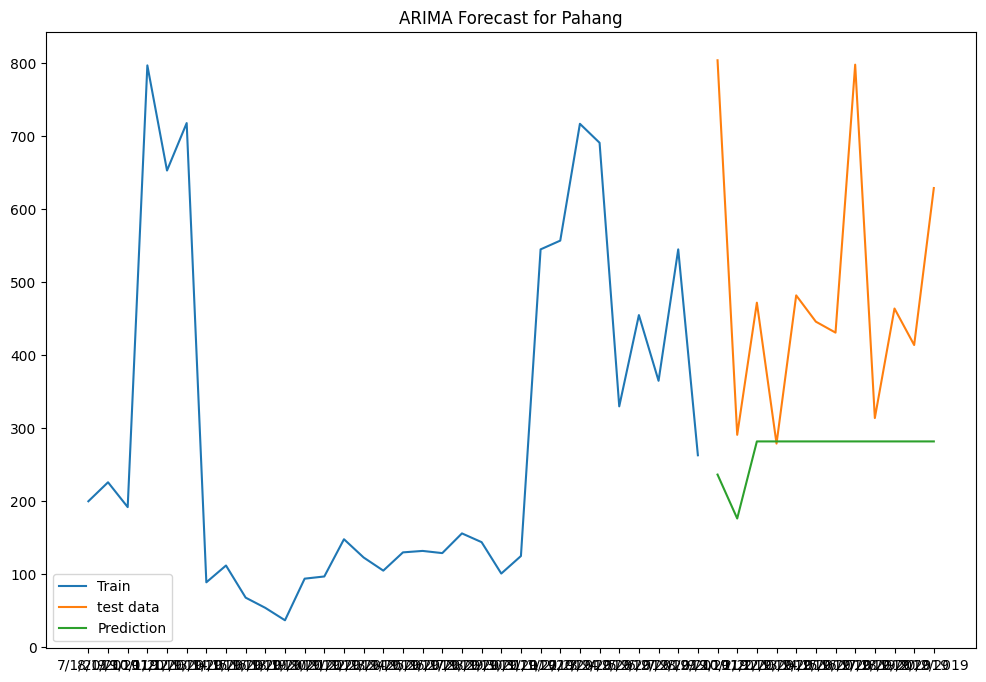

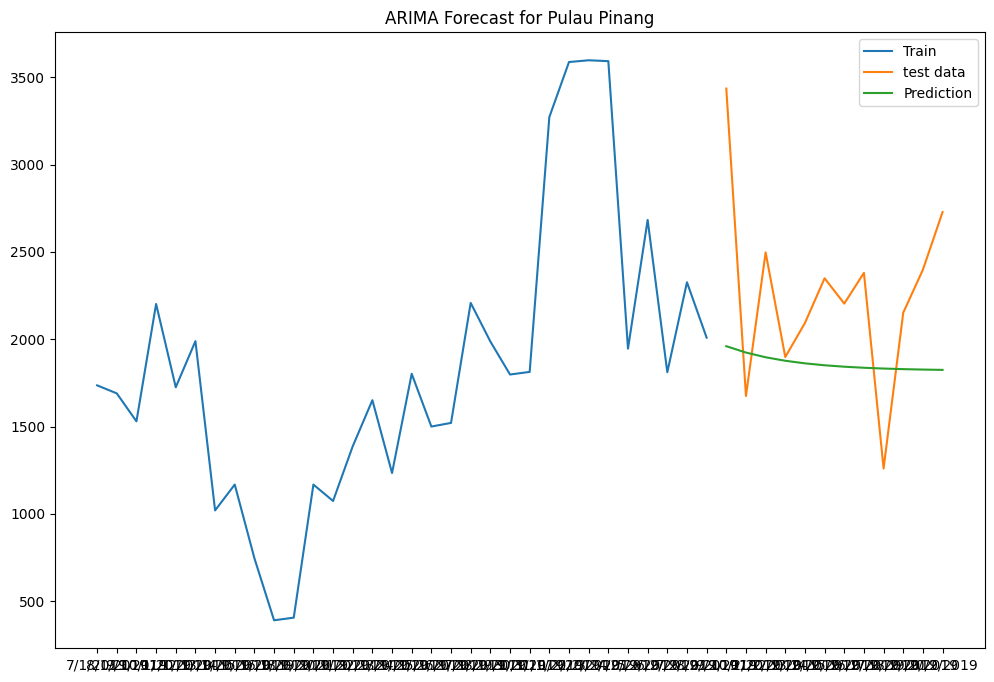

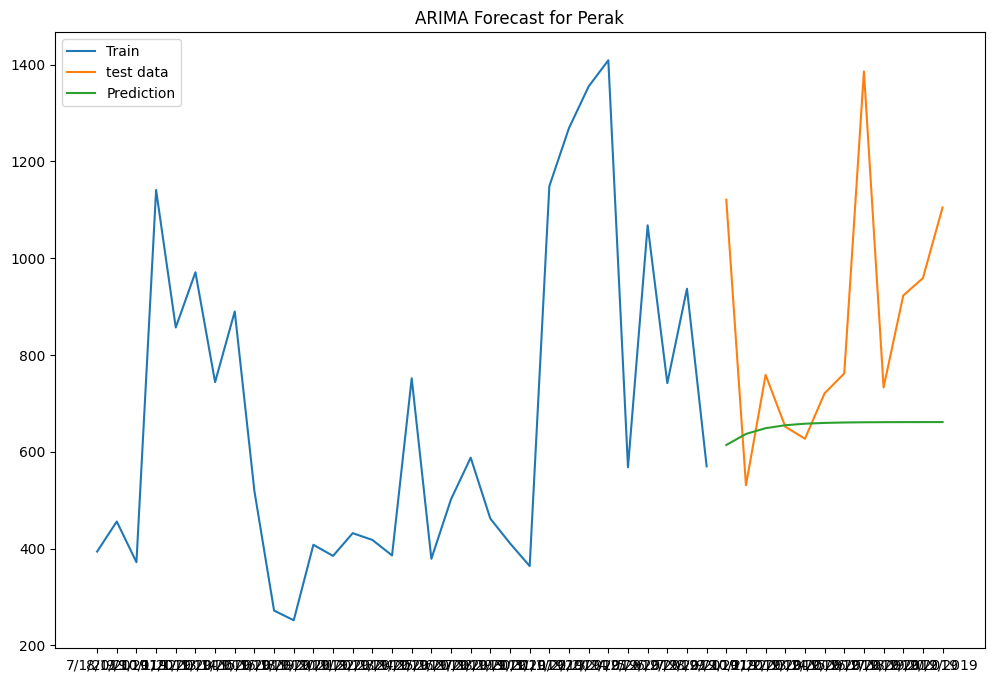

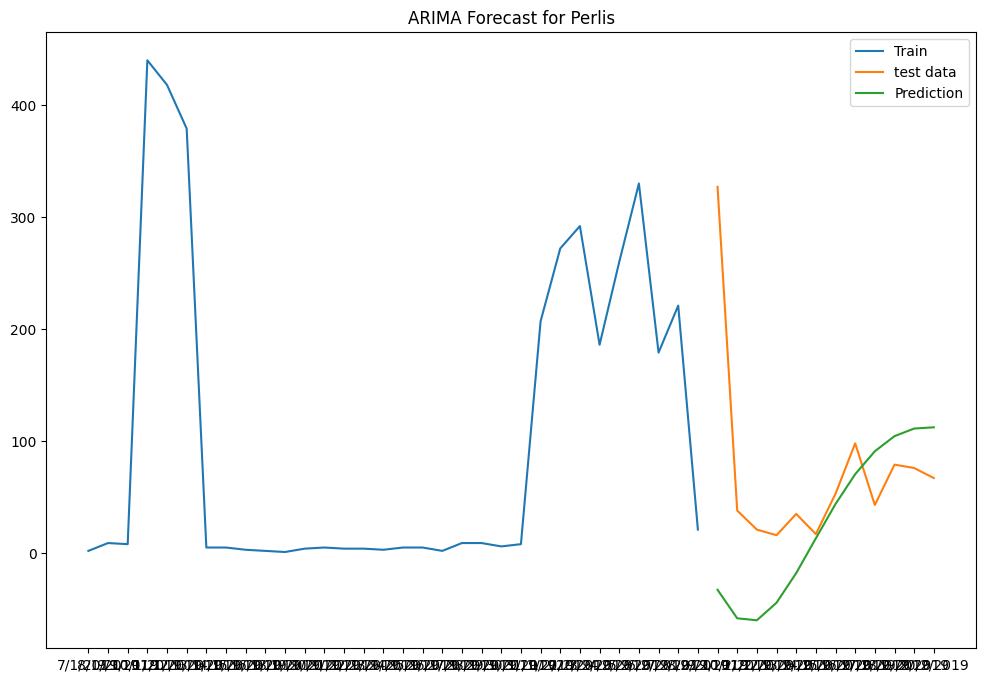

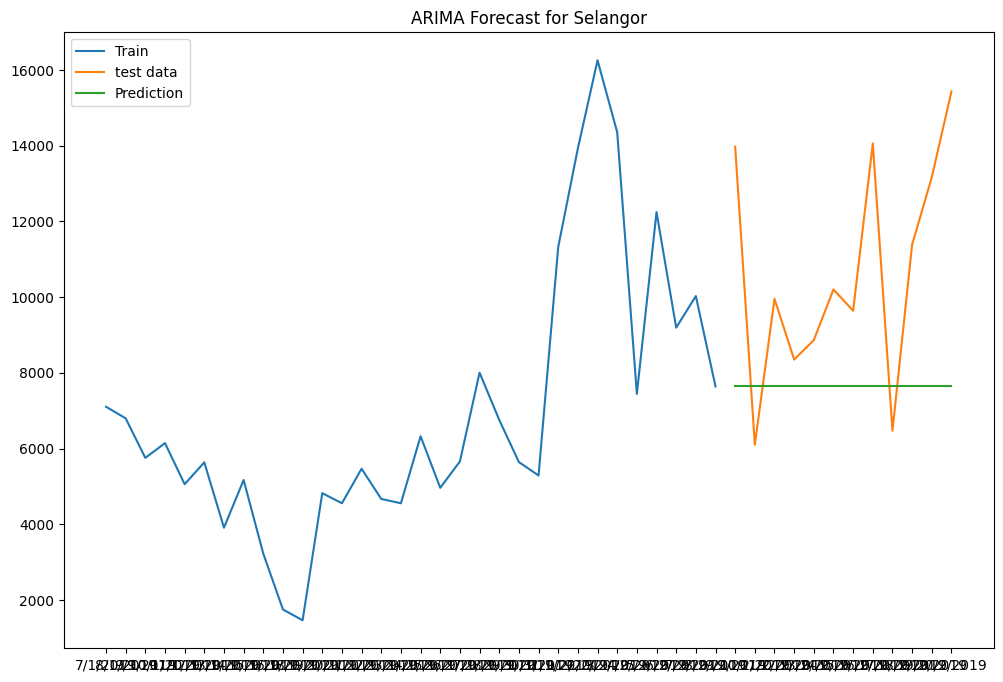

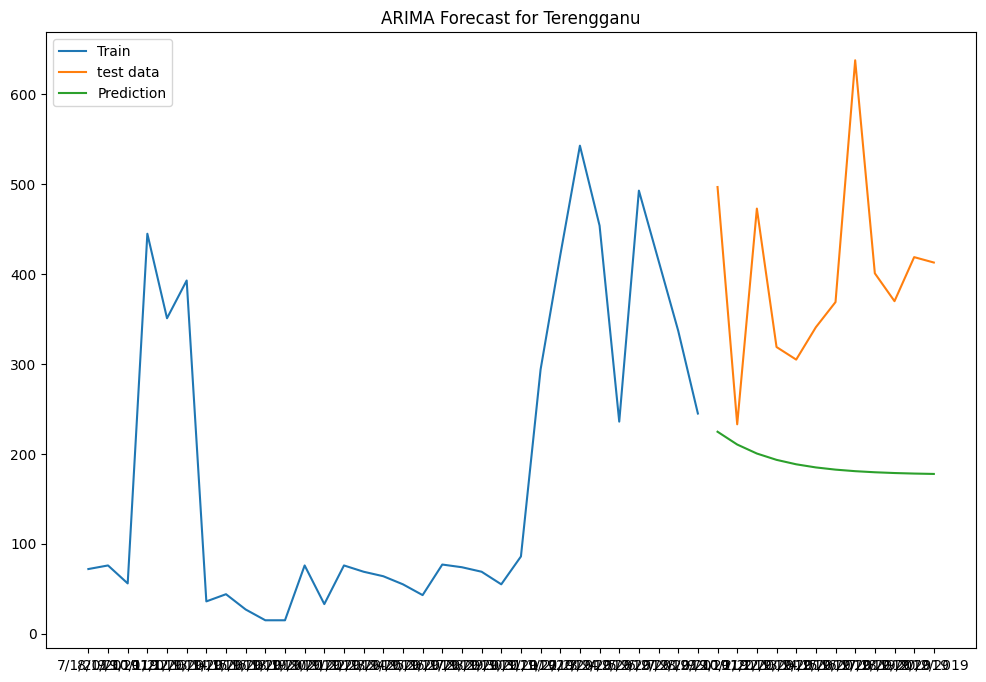

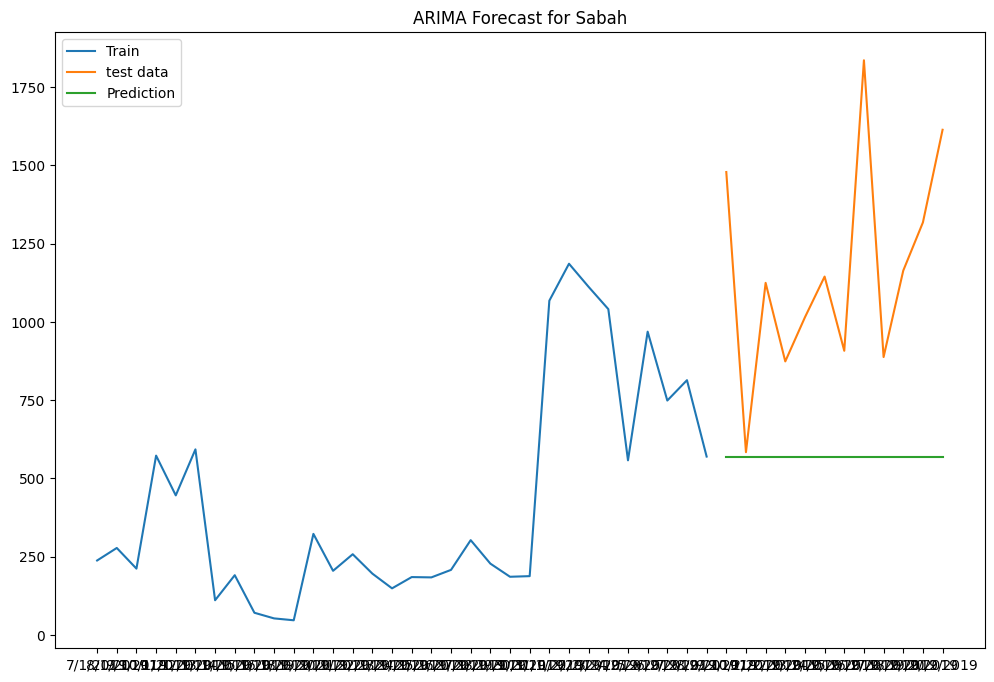

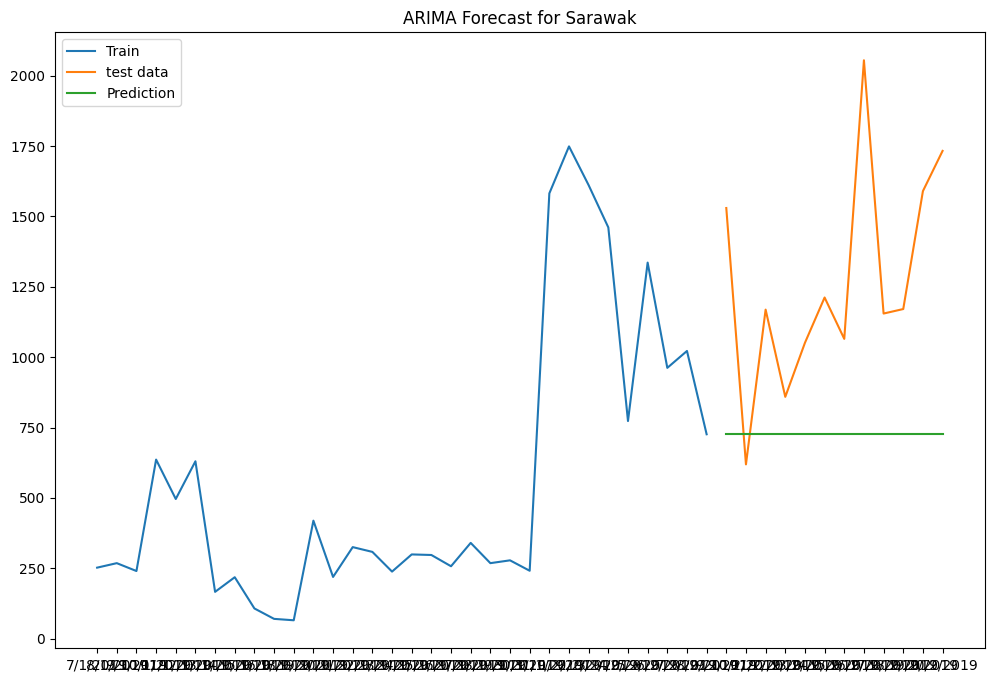

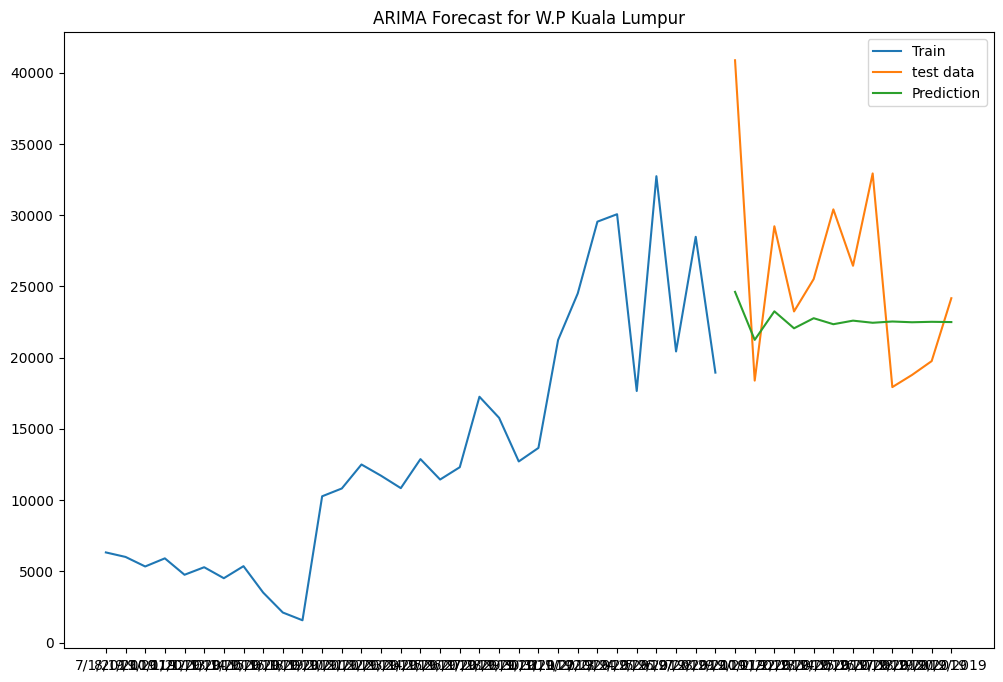

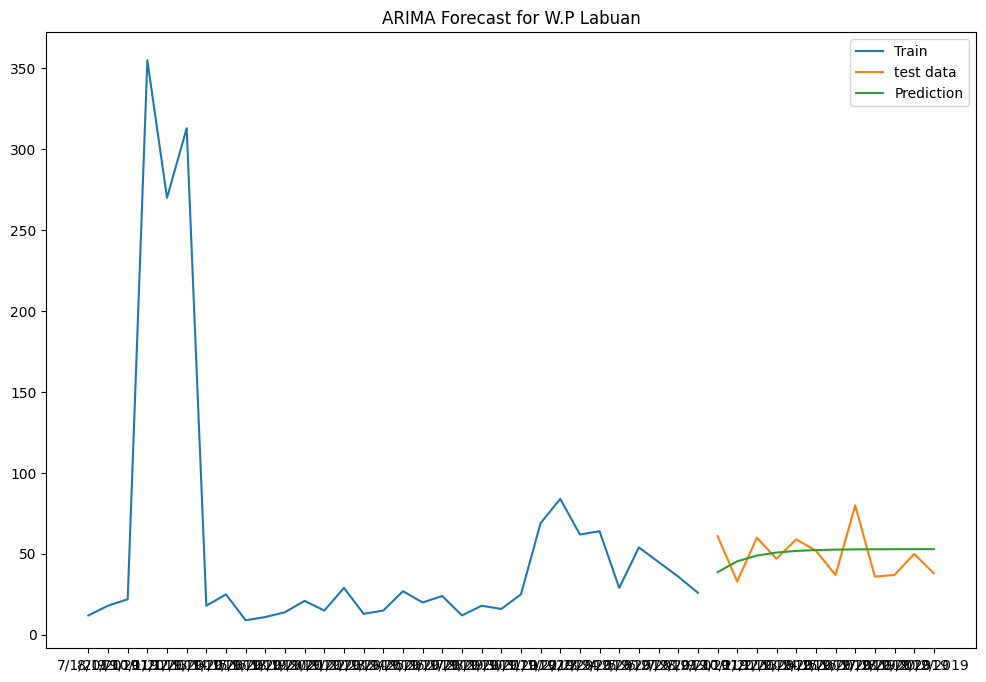

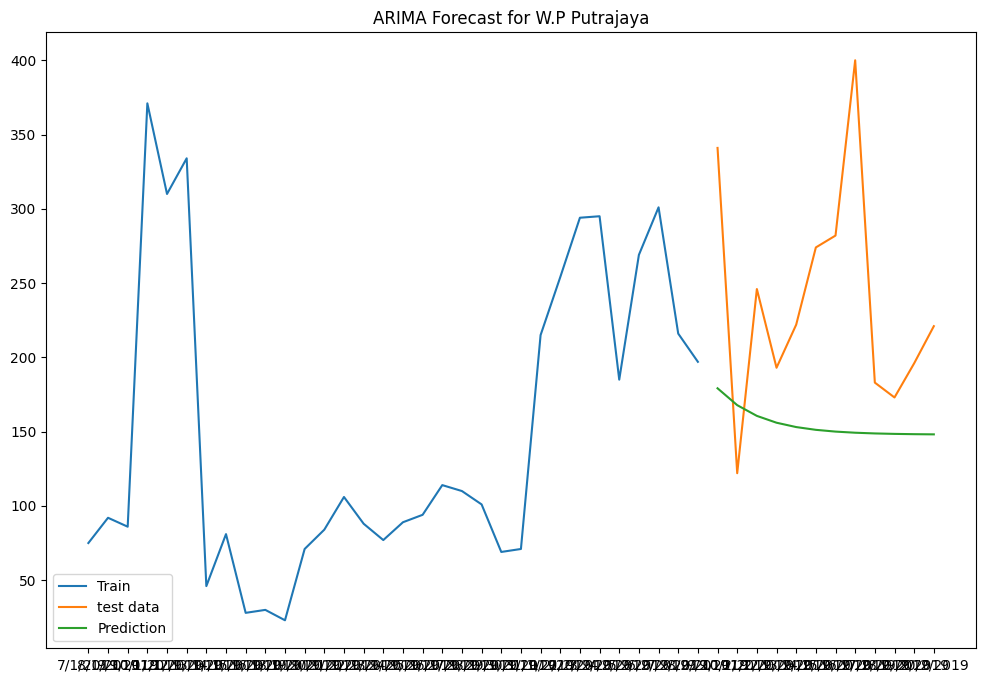

In [290]:
for i in range(df.shape[1]):
    column_name = df.columns[i]
    column_data = df.iloc[:, i]  # Access column data using iloc
    
    # plot the predictions for validation set
    plt.figure(figsize=(12,8))
    plt.plot(train_diff.iloc[:,i], label='Train')
    plt.plot(test_diff.iloc[:,i], label='test data')
    plt.plot(ARIMA_forecast.iloc[:,i], label='Prediction')
    plt.title(f'ARIMA Forecast for {column_name}')
    plt.legend(loc='best')

### ARIMA Accuracy Testing

In [291]:
for i in range(df.shape[1]):
    mae = mean_absolute_error(test_diff.iloc[:,i], ARIMA_forecast.iloc[:,i])
    mse = mean_squared_error(test_diff.iloc[:,i], ARIMA_forecast.iloc[:,i])
    rmse = np.sqrt(mse)
    print(test_diff.iloc[:,i].name)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("\n")


Johor
Mean Absolute Error (MAE): 1379.57
Mean Squared Error (MSE): 3212663.54
Root Mean Squared Error (RMSE): 1792.39


Kedah
Mean Absolute Error (MAE): 305.30
Mean Squared Error (MSE): 163098.01
Root Mean Squared Error (RMSE): 403.85


Kelantan
Mean Absolute Error (MAE): 85.49
Mean Squared Error (MSE): 14697.42
Root Mean Squared Error (RMSE): 121.23


Melaka
Mean Absolute Error (MAE): 549.67
Mean Squared Error (MSE): 417844.98
Root Mean Squared Error (RMSE): 646.41


Negeri Sembilan
Mean Absolute Error (MAE): 91.89
Mean Squared Error (MSE): 13719.11
Root Mean Squared Error (RMSE): 117.13


Pahang
Mean Absolute Error (MAE): 216.44
Mean Squared Error (MSE): 74890.24
Root Mean Squared Error (RMSE): 273.66


Pulau Pinang
Mean Absolute Error (MAE): 529.13
Mean Squared Error (MSE): 408366.16
Root Mean Squared Error (RMSE): 639.04


Perak
Mean Absolute Error (MAE): 226.57
Mean Squared Error (MSE): 98293.70
Root Mean Squared Error (RMSE): 313.52


Perlis
Mean Absolute Error (MAE): 70.37
Mean 

# 5. Linear Regression with Time Series

## 5.1 Fit the feature

### 5.1.1 Create Trend Feature

In [292]:
moving_average = df.Total.rolling(
    window=12,       # 12-months window
    center=True,      # puts the average at the center of the window
    min_periods=6,  # choose about half the window size
).mean()              # compute the mean (could also do median, std, min, max, ...)

ax = df.Total.plot(style=".", color="0.5")
moving_average.plot(
    ax=ax, linewidth=3, title="Job Vacancy", legend=False,
)

AttributeError: 'DataFrame' object has no attribute 'Total'

In [ ]:
train['count'] = range(1, len(train) + 1)

X = train[['count']]  # features
y = train['Total']  # target

# create the trend feature
dp = DeterministicProcess(
    index=train.index,  # dates from the training data
    constant=True,       # dummy feature for the bias (y_intercept)
    order=2,             # the time dummy (trend)
    drop=True,           # drop terms if necessary to avoid collinearity
)

X = dp.in_sample()
X

### 5.1.2 Create Seasonality

In [ ]:
# Assuming you have the 'train' DataFrame with a date column
# Convert the date column to a DateTimeIndex
#train['date'] = pd.to_datetime(train['date'])
#train.index = train['date']

# Calculate the quarter for each timestamp
train['quarter'] = (train.index.month - 1) // 3 + 1

# Create quarterly seasonality indicator variables
train['quarter_Q1'] = (train['quarter'] == 1).astype(int)
train['quarter_Q2'] = (train['quarter'] == 2).astype(int)
train['quarter_Q3'] = (train['quarter'] == 3).astype(int)
train['quarter_Q4'] = (train['quarter'] == 4).astype(int)

# Create the feature matrix (X) including quarterly seasonality indicators
X1 = train[['quarter_Q1', 'quarter_Q2', 'quarter_Q3', 'quarter_Q4']]
X1

# remove the quarter column in train
train = train.drop(['quarter_Q1'], axis=1)
train = train.drop(['quarter_Q2'], axis=1)
train = train.drop(['quarter_Q3'], axis=1)
train = train.drop(['quarter_Q4'], axis=1)

In [ ]:
#train['date'] = train.index
X['date'] = train.index
#X['date']  = X.index
X.index = pd.to_datetime(X.index)

# Create Seosonal Feature
fourier = CalendarFourier(freq="M", order=12)  # 10 sin/cos pairs for "A"nnual seasonality

dp = DeterministicProcess(
    index= train.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=3,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True                  # drop terms to avoid collinearity
)

X = dp.in_sample()  # create features for dates in tunnel.index


In [ ]:
train.index = pd.to_datetime(train.index, unit='s')
train.index

## 5.2 Fit the Model

In [ ]:
X.head()
test.index

In [ ]:
model = LinearRegression(fit_intercept=False)
_ = model.fit(X, y)

y_pred = pd.Series(model.predict(X), index= y.index)
X_fore = dp.out_of_sample(steps=9, forecast_index=test.index)
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

ax = y.plot(color='0.25', style='.', title="Unemployment Rate")
ax = y_pred.plot(ax=ax, label="Seasonal")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
_ = ax.legend()
test['Total'].plot(legend=True, figsize=(12,8))

In [ ]:
ax = y.plot(alpha=0.5)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title('Time Plot of Jjob Vacancy from 2010 to 2023 in Malaysia')

## Linear Regression Accuracy Test

In [ ]:
len(y_pred)
len(y_fore)
len(test.Total)

In [ ]:
rms = sqrt(mean_squared_error(test.Total,y_fore))
print("RMSE: ", rms)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test.Total, y_fore)
print("MAE: ", mae)

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(test.Total, y_fore)
print("MAPE: ", mape)